## import packages

In [2]:
import collections
from datetime import datetime
from IPython.display import clear_output, display, HTML
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
from pathlib import Path
import pickle
import scipy
# import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
import sys
from scipy.ndimage import gaussian_filter1d
from wfOpto import *
import imageio   
from IPython.display import HTML
import matplotlib.patches as patches


In [3]:
import pytoolsAL as ptAL

pytoolsAL: Modules missing.  Not loading neuropixels.  Message: No module named 'slidingRP'


In [3]:
#work
plt.style.use(r'C:\Users\nadia\Documents\GitHub\steinmetzlab\ALpres.mplstyle')

In [4]:
#personal
plt.style.use(r'C:\GitHub\steinmetzlab\ALpres.mplstyle')

## Power:Inactivation figs

### import

In [ ]:
dataOp312_AB32 = wfOpto(Path(r'Y:\Subjects\AB_0026\2024-03-12\1'))

In [ ]:
dataOp425_AB32 = wfOpto(Path(r'Y:\Subjects\AB_0032\2024-04-25\1'))

In [ ]:
dataOp621_AB32 = wfOpto(Path(r'Y:\Subjects\AB_0032\2024-06-21\1'))

In [168]:
dataOp622_AL33 = wfOpto(Path(r'Y:\Subjects\AL_0033\2024-06-22\1'))

In [ ]:
dataOp628_AB32 = wfOpto(Path(r'Y:\Subjects\AB_0032\2024-06-28\3'))

In [ ]:
dataOp729_AB32 = wfOpto(Path(r'Y:\Subjects\AB_0032\2024-07-29\1'))

In [ ]:
dataOp628_AB32 = wfOpto(Path(r'Y:\Subjects\AB_0032\2024-06-28\3'))

In [ ]:
dataOp628_AB32 = wfOpto(Path(r'Y:\Subjects\AB_0032\2024-06-28\3'))

In [167]:
dataOp621_AB32 = wfOpto(Path(r'Y:\Subjects\AB_0032\2024-06-21\1'))

In [166]:
dataOp709_AL33 = wfOpto(Path(r'Y:\Subjects\AL_0033\2024-07-09\1'))

In [165]:
dataOp712_AL33 = wfOpto(Path(r'Y:\Subjects\AL_0033\2024-07-12\1'))

In [164]:
dataOp718_AL33 = wfOpto(Path(r'Y:\Subjects\AL_0033\2024-07-18\1'))

In [ ]:
dataOp719_AL33 = wfOpto(Path(r'Y:\Subjects\AL_0033\2024-07-19\1'))

In [ ]:

dataOp724_AB32 = wfOpto(Path(r'Y:\Subjects\AB_0032\2024-07-24\1'))

In [ ]:
dataOp725_AL34 = wfOpto(Path(r'Y:\Subjects\AL_0034\2024-07-25\1'))

In [4]:
dataOp729_AB32 = wfOpto(Path(r'Y:\Subjects\AB_0032\2024-07-29\1'))

### fig funcs

#### working on df/f

annas way:

In [ ]:
data=dataOp628_AB32
power=3
y=400
x=120
galvoX=0
galvoY=4
colors=['deepskyblue','dodgerblue','mediumblue']
powers = np.array([0.2,1.7,3]) #can also change for mouse, depending!
pxPowers = []
n_samples = 650
timestamps = np.linspace(-0.3, 1, n_samples)*1000

#changes per mouse
galvoXtr=np.argwhere(data.galvoX==galvoX).ravel()
galvoYtr=np.argwhere(data.galvoY==galvoY).ravel()
loc=np.intersect1d(galvoXtr,galvoYtr)

pixel_ix = np.ravel_multi_index((y,x), (data.py, data.px))
pwTrs = np.argwhere(data.laserPowers == power).ravel()
theseTrs=np.intersect1d(pwTrs,loc)
onTimes = data.laserOn[theseTrs]
trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
trs = np.squeeze(np.array(trs))

thisPower=[]

wf = np.mean(data.tToWFManual(trs),axis=0) #averaging over trials: (40, 650, 500) --> (650, 500) -- 650 timestamps over 500 components
dwf = [np.diff(i, prepend=i[0]) for i in wf.T] #finding difference of activty between time(i+1) - time(i) for each of the 500 components
                                               #so represents activity change over time
                                               # wf.T (500, 650) --> dwf (500, 650)
                                               
dwf = np.array(dwf)                            
mov = data.svdSpat[pixel_ix] @ dwf  # gets rid of the components b/c you're (matrix) multiplying in the spatial components? 
                                    # (500 spatial) * (500 spatial, 650 times) = (650 times)
plt.plot(timestamps,mov)

print(f'wf {wf.shape}')
print(f'wf.T {wf.T.shape}')
print(f'dwf {dwf.shape}')
print(f'mov {mov.shape}')
print(f'pixel {data.svdSpat[pixel_ix].shape}')


In [ ]:
data=dataOp425
meanimg=data.meanImage

In [ ]:
data=dataOp425
meanimg=data.meanImage
power=3
y=380
x=120
galvoX=0
galvoY=3.3
colors=['deepskyblue','dodgerblue','mediumblue']
powers = np.array([0.2,1.7,3]) #can also change for mouse, depending!
pxPowers = []
n_samples = 650
timestamps = np.linspace(-0.3, 1, n_samples)*1000

#changes per mouse
galvoXtr=np.argwhere(data.galvoX==galvoX).ravel()
galvoYtr=np.argwhere(data.galvoY==galvoY).ravel()
loc=np.intersect1d(galvoXtr,galvoYtr)

pixel_ix = np.ravel_multi_index((y,x), (data.py, data.px))
pwTrs = np.argwhere(data.laserPowers == power).ravel()
theseTrs=np.intersect1d(pwTrs,loc)
onTimes = data.laserOn[theseTrs]
trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
trs = np.squeeze(np.array(trs))

thisPower=[]

#without the deconvolving. only using that meanimg
wf = np.mean(data.tToWFManual(trs),axis=0) #avg over trials
mov = data.svdSpat[pixel_ix] @ wf.T #add back in spatial -- this now gives us F(t)
meanimg = meanimg.reshape(560,560,-1)
avg = meanimg[y, x] #find the mean of the pixel we are interested in - F0
mov_mean_dff = (mov)/avg #df/f -- F(t) - F0 / F0

# with the diff - deconvolving
# no meanimg involved
wf = np.mean(data.tToWFManual(trs),axis=0) 
dwf = [np.diff(i, prepend=i[0]) for i in wf.T]                                               
dwf = np.array(dwf)                           
mov_diff = data.svdSpat[pixel_ix] @ dwf

#with the diff (deconvolving) and the df/f
#must use the diff for the meanimg
wf = np.mean(data.tToWFManual(trs),axis=0) 
dwf = [np.diff(i, prepend=i[0]) for i in wf.T]                                               
dwf = np.array(dwf)                         
mov = data.svdSpat[pixel_ix] @ dwf 
meanpix=np.mean(mov,axis=0) * -1
mov_diff_dff=(mov-meanpix)/meanpix 

In [ ]:
f = plt.figure(figsize=(12, 3.5))
gs = mpl.gridspec.GridSpec(1, 3)

ax=plt.subplot(gs[0])
ax.plot(timestamps,mov_mean_dff)
ax.set_title("No deconvolving. pixel activity/mean pixel activity")

ax=plt.subplot(gs[1])
ax.plot(timestamps,mov_diff)
ax.set_title("Using diff to deconvolve. no df/f")

ax=plt.subplot(gs[2])
ax.plot(timestamps,mov_diff_dff)
ax.set_title("Using deconvolving, and doing df/f using deconvolved signal")

#### ROI

In [ ]:
data=dataOp425
power=3
y=400
x=120
galvoX=0
galvoY=3.3
colors=['deepskyblue','dodgerblue','mediumblue']
powers = np.array([0.2,1.7,3]) #can also change for mouse, depending!
pxPowers = []
n_samples = 650
timestamps = np.linspace(-0.3, 1, n_samples)*1000

#changes per mouse
galvoXtr=np.argwhere(data.galvoX==galvoX).ravel()
galvoYtr=np.argwhere(data.galvoY==galvoY).ravel()
loc=np.intersect1d(galvoXtr,galvoYtr)

pixel_ix = np.ravel_multi_index((y,x), (data.py, data.px))
pwTrs = np.argwhere(data.laserPowers == power).ravel()
theseTrs=np.intersect1d(pwTrs,loc)
onTimes = data.laserOn[theseTrs]
trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
trs = np.squeeze(np.array(trs))

thisPower=[]
wf = np.mean(data.tToWFManual(trs),axis=0)
dwf = [np.diff(i, prepend=i[0]) for i in wf.T] 
dwf = np.array(dwf)
mov = data.svdSpat @ dwf
mov = mov.reshape(560,560,-1)
videoROI = mov[300:400, 100:200] # ROI vid with average activity
avgOverRoi=np.mean(videoROI,axis=(0,1))
plt.plot(timestamps,avgOverRoi)

# well ti worked but idk if that actually did anything

In [9]:
def powerDep3Pow(ax,data,mouse,date,galvoX,galvoY,y,x,n_samples=650,pows=[0.2,1.7,3],ylim=[-40,40]):
    colors=['deepskyblue','dodgerblue','mediumblue']
    pxPowers = []
    timestamps = np.linspace(-0.3, 1, n_samples)*1000
    # x=240
    #changes per mouse
    galvoXTr=np.argwhere(data.galvoX==galvoX).ravel()
    galvoYTr=np.argwhere(data.galvoY==galvoY).ravel()
    loc=np.intersect1d(galvoXTr,galvoYTr)

    pixel_ix = np.ravel_multi_index((y,x), (data.py, data.px))
    for iP, power in enumerate(pows):
        pwTrs = np.argwhere(data.laserPowers == power).ravel()
        theseTrs=np.intersect1d(pwTrs,loc)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
        trs = np.squeeze(np.array(trs))
        
        thisPower = []
        for iT, tr in enumerate(trs):
            wf = data.tToWFManual(tr)
            dwf = [np.diff(i, prepend=i[0]) for i in wf.T] 
            dwf = np.array(dwf)
            mov = data.svdSpat[pixel_ix] @ dwf
            thisPower.append(mov)
        thisPower = np.array(thisPower)
        pxPowers.append(thisPower)

    for c,iP in enumerate(pxPowers):
        plt.plot(timestamps, np.mean(iP, axis=0),linewidth=2,color=colors[c])
        plt.fill_between(timestamps, \
                np.mean(iP, axis=0)-scipy.stats.sem(iP,axis=0),\
                np.mean(iP,axis=0)+scipy.stats.sem(iP,axis=0), color=colors[c], label='_nolegend_',alpha=.3,linewidth=0)
        
    plt.legend(['0.07 mW', '0.63 mW', '1.1 mW'], loc='upper right',bbox_to_anchor=(1.2,1))
    plt.xlabel('Time (ms)')
    plt.ylabel('Brain Activity df')
    plt.title(f'Inactivation 3 Powers mouse {mouse} {date}')
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(200))
    plt.axvspan(0,100,color='gray',alpha=.2,lw=0,label='_nolegend_')
    plt.ylim(ylim)


In [10]:
def powerDepAllPow(ax,data,mouse,date,galvoX,galvoY,y,x,n_samples=650):
    powers = np.unique(data.laserPowers)
    colors=plt.cm.Blues(np.linspace(0,1,powers.shape[0]))
    pxPowers = []
    timestamps = np.linspace(-0.3, 1, n_samples)*1000

    #this depends on mouse (and maybe day) !!!!!
    galvoXTr=np.argwhere(data.galvoX==galvoX).ravel()
    galvoYTr=np.argwhere(data.galvoY==galvoY).ravel()
    loc=np.intersect1d(galvoXTr,galvoYTr)

    pixel_ix = np.ravel_multi_index((y, x), (data.py, data.px))
    for iP, power in enumerate(powers):
        pwTrs = np.argwhere(data.laserPowers == power).ravel()
        theseTrs=np.intersect1d(pwTrs,loc)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
        trs = np.squeeze(np.array(trs))
        
        thisPower = []
        for iT, tr in enumerate(trs):
            wf = data.tToWFManual(tr)
            dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
            dwf = np.array(dwf)
            mov = data.svdSpat[pixel_ix] @ dwf
            thisPower.append(mov)
        thisPower = np.array(thisPower)
        pxPowers.append(thisPower)

        for i,iP in enumerate(pxPowers):
            plt.plot(timestamps, np.mean(iP, axis=0),color=colors[i])
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(200))
        plt.xlabel('time (ms)')
        plt.title('Inactivation All Powers')

In [11]:
def powerQuant(ax,data,y,x,galvoX,galvoY,n_samples=650):
    powers = np.unique(data.laserPowers)
    pxPowers = []
    timestamps = np.linspace(-0.3, 1, n_samples)*1000

    #changes per mouse!!
    galvoXTr=np.argwhere(data.galvoX==galvoX).ravel()
    galvoYTr=np.argwhere(data.galvoY==galvoY).ravel()
    loc=np.intersect1d(galvoXTr,galvoYTr)

    pixel_ix = np.ravel_multi_index((y, x), (data.py, data.px))
    for iP, power in enumerate(powers):
        pwTrs = np.argwhere(data.laserPowers == power).ravel()
        theseTrs=np.intersect1d(pwTrs,loc)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
        trs = np.squeeze(np.array(trs))
        
        thisPower = []
        for iT, tr in enumerate(trs):
            wf = data.tToWFManual(tr)
            dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
            dwf = np.array(dwf)
            mov = data.svdSpat[pixel_ix] @ dwf
            thisPower.append(mov)
        thisPower = np.array(thisPower)
        pxPowers.append(thisPower[:45])

    pixelInterp = scipy.interpolate.interp1d(timestamps, pxPowers, axis=2, fill_value='extrapolate')

    time90 = pixelInterp(90)

    timeMean = np.mean(time90, axis=1)
    plt.plot(powers,timeMean,'-o',c='k',lw=2)
    plt.errorbar(powers,timeMean,yerr=.8,c='k')
    plt.scatter(powers,timeMean)
    plt.xlabel("Laser powers (mW)")
    plt.title("Inactivation at Peak (90 ms)")

### panels, and specify day

In [28]:
dataset=dataOp622_AL33
mouseset='AL33'
day="6/22/24"
info='PI'

In [ ]:
plt.imshow(dataOp719_AL33.meanImage)
plt.scatter(x=200,y=350,color='orange')

In [ ]:
np.unique(dataOp726_AB_calib.galvoX)

In [ ]:
np.unique(dataOp725_AL34.laserPowers).shape[0]

In [ ]:
dataset.laserPowers.shape

In [ ]:
np.argwhere(data.laserPowers[:10] == 2).ravel()

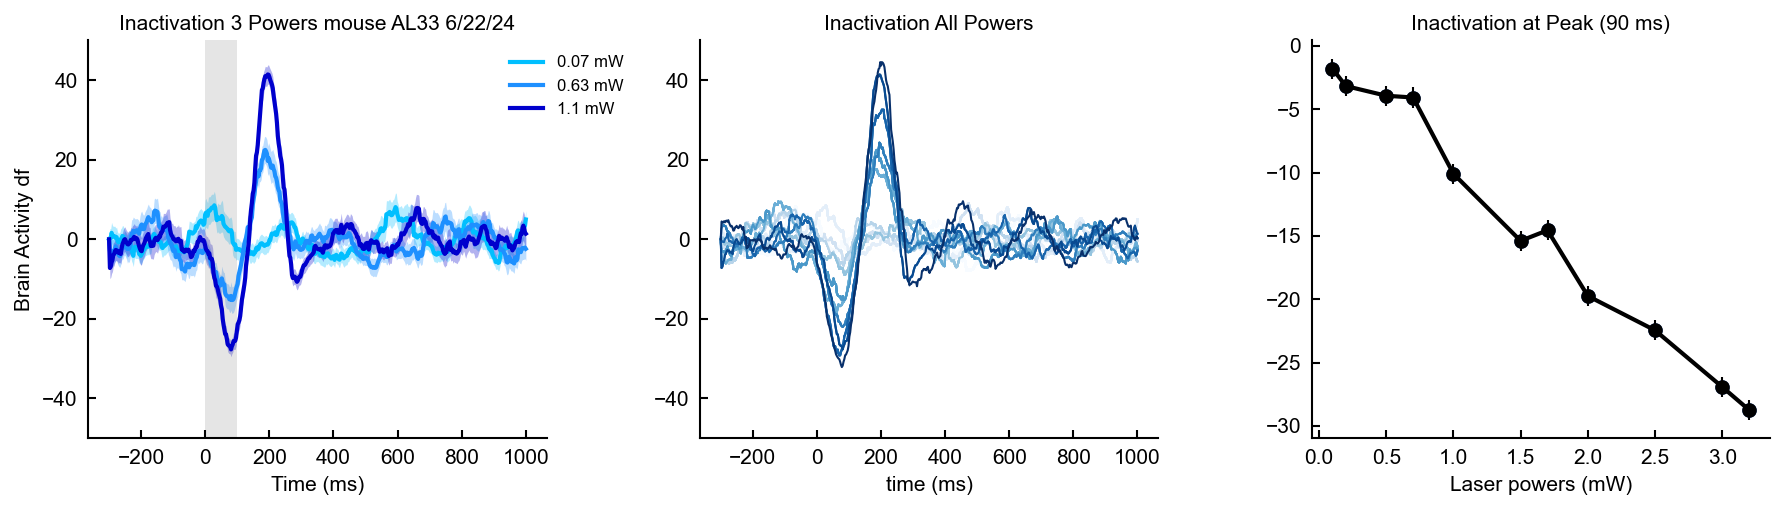

In [30]:
gX=0
gY=3 

f = plt.figure(figsize=(12, 3.5))
gs = mpl.gridspec.GridSpec(1, 3)

ax = plt.subplot(gs[0])
powerDep3Pow(ax,data=dataset,date=day,mouse=mouseset,y=350,x=200,galvoX=gX,galvoY=gY,n_samples=500,pows=[0.2,1.7,3])
plt.ylim([-50,50])

ax = plt.subplot(gs[1])
powerDepAllPow(ax,data=dataset,mouse=mouseset,date=day,y=350,x=200,galvoX=gX,galvoY=gY,n_samples=500)
plt.ylim([-50,50])

ax = plt.subplot(gs[2])
powerQuant(ax,data=dataset,galvoX=gX,galvoY=gY,y=350,x=200,n_samples=500)

# f.tight_layout()

In [ ]:
np.unique(dataset.laserPowers)

In [ ]:
len(pxPowers[0])

In [ ]:
len(timestamps)

In [ ]:
for power in pxPowers:
    print(len(power))

In [ ]:
powerDep3Pow(ax,data=dataOp729_AB32_exp_wtihcam,date='7/29',mouse='AB32',y=400,x=200,galvoX=gX,galvoY=gY,n_samples=500)


In [ ]:
def makeVideo(data,galvoX=0,galvoY=3.3,power=1,n_samples=300):
    power = np.argwhere(data.laserPowers==power).ravel() 
    galvoXTrs=np.argwhere(data.galvoX==galvoX).ravel() #change for loc stim
    galvoYTrs=np.argwhere(data.galvoY==galvoY).ravel() #change for loc stim

    #find trials
    px = np.intersect1d(galvoYTrs,galvoXTrs)
    theseTrs=np.intersect1d(px,power)
    allVideos=[]

    onTimes = data.laserOn[theseTrs]
    trs = [np.linspace(-0.1+on, 1+on, 100) for on in onTimes]
    trs = np.squeeze(np.array(trs))

    wf = np.mean(data.tToWf(trs), axis=0)

    dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
    dwf = np.array(dwf)
    mov = data.svdSpat @ dwf
    allVideos = mov.reshape(data.px, data.py, -1)
    allVideos=np.array(allVideos)
    return allVideos

In [ ]:
vid = makeVideo(dataOp724_AB32,galvoX=0,galvoY=4,power=3)

In [ ]:
plt.imshow(vid[:,:,20],cmap='bwr',clim=np.percentile(vid[:,:,15],(2,99.9)))
plt.scatter(x=150,y=450)

In [ ]:
n_cols=5;n_rows=10
f = plt.figure(figsize=(n_cols*2, n_rows*2))
gs = mpl.gridspec.GridSpec(n_rows, n_cols)
for i in range(50):
    ax = plt.subplot(gs[i])
    brain=plt.imshow(vid[:, :, i*2], clim = np.percentile(vid, (2, 99.9)), cmap='bwr')
    plt.colorbar(brain)

In [ ]:
time = np.linspace(-.1, 1, 300)
plt.plot(time,vid[200,400,:])

In [ ]:
vid.shape

In [ ]:
plt.imshow(vid[:,:,40],cmap='bwr',clim=np.percentile(vid,(2,99.9)))
plt.scatter(x=200,y=400,s=5,color='orange')

In [ ]:
# full 7/25

powerDep3Pow(ax,data=dataOp725_AL34,date=day,mouse=mouseset,y=400,x=400,galvoX=2,galvoY=2,n_samples=500,pows=[0.2,1.7,3])

In [ ]:
# full 7/29

powerDep3Pow(ax,data=dataOp729_AL34,date=day,mouse=mouseset,y=400,x=400,galvoX=gX,galvoY=gY,n_samples=500,pows=[0.2,1.7,3])

In [ ]:
# 7/29 calib

powerDep3Pow(ax,data=dataOp729_AL34_calib,date='7/29',mouse=mouseset,y=400,x=400,galvoX=gX,galvoY=gY,n_samples=500,pows=[0.2,1.7,3])

In [ ]:
fig.savefig(f'C:\GitHub\steinmetzlab\wf + opto\figs\control\{info} {mouse}_{date}')

### overlaying multiple days/preparations

In [ ]:
def powerQuantReturn(data,y,x,galvoY,galvoX):
    powers = np.unique(data.laserPowers)
    pxPowers = []
    n_samples = 650
    timestamps = np.linspace(-0.3, 1, n_samples)*1000

    #changes per mouse!!
    galvoXtrs=np.argwhere(data.galvoX==galvoX).ravel()
    galvoYtrs=np.argwhere(data.galvoY==galvoY).ravel()
    loc=np.intersect1d(galvoXtrs,galvoYtrs)

    pixel_ix = np.ravel_multi_index((y, x), (data.py, data.px))
    for iP, power in enumerate(powers):
        pwTrs = np.argwhere(data.laserPowers == power).ravel()
        theseTrs=np.intersect1d(pwTrs,loc)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
        trs = np.squeeze(np.array(trs))
        
        thisPower = []
        for iT, tr in enumerate(trs):
            wf = data.tToWFManual(tr)
            dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
            dwf = np.array(dwf)
            mov = data.svdSpat[pixel_ix] @ dwf
            thisPower.append(mov)
        thisPower = np.array(thisPower)
        pxPowers.append(thisPower[:30])

    pixelInterp = scipy.interpolate.interp1d(timestamps, pxPowers, axis=2, fill_value='extrapolate')

    time90 = pixelInterp(90)

    return(np.mean(time90, axis=1))

In [ ]:
# quant622=powerQuantReturn(data=dataOp622_AB33,y=390,x=170,galvoX=0,galvoY=3)
quant312=powerQuantReturn(data=dataOp312_AB32,y=390,x=170,galvoX=0,galvoY=2.5)
quant425=powerQuantReturn(data=dataOp425_AB32,y=390,x=170,galvoX=0,galvoY=3.3)
quant621=powerQuantReturn(data=dataOp621_AB32,y=390,x=170,galvoX=0,galvoY=4)
quant628=powerQuantReturn(data=dataOp628_AB32,y=390,x=170,galvoX=0,galvoY=4)
quant729=powerQuantReturn(data=dataOp729_AB32,y=390,x=170,galvoX=0,galvoY=4)



In [ ]:
days=[quant312,quant425,quant621,quant729]

In [ ]:
powers = np.unique(dataOp425_AB32.laserPowers)

In [ ]:
for day in days:
    print(day.shape[0])

accross days

In [ ]:
f = plt.figure(figsize=(4/1.5, 3/1.5), dpi=300) 
colors=plt.cm.winter(np.linspace(0,1,4))
labels=['3/12', '4/25', '6/21','7/29']
for i,day in enumerate(days):
    plt.plot(powers[0:day.shape[0]],day,'-o',c=colors[i],lw=1,markersize=2)

    plt.errorbar(powers[0:day.shape[0]],day,yerr=1,c=colors[i],label='_nolegend_')

    plt.scatter(powers[0:day.shape[0]],day,label='_nolegend_',s=.5)

plt.legend(labels,loc='upper right',fontsize=5)
plt.xlabel("Laser powers (mW)",fontsize=7)
plt.ylabel('Brain Activity df/f',fontsize=7)
plt.title("Inactivation at Peak Across Days - AL33",fontsize=8)

across preps

In [ ]:
def powerQuantReturn2(data,y,x):
    powers = np.unique(data.laserPowers)
    pxPowers = []
    n_samples = 650
    timestamps = np.linspace(-0.3, 1, n_samples)*1000

    pixel_ix = np.ravel_multi_index((y, x), (data.py, data.px))
    for iP, power in enumerate(powers):
        theseTrs = np.argwhere(data.laserPowers == power).ravel()
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
        trs = np.squeeze(np.array(trs))
        
        thisPower = []
        for iT, tr in enumerate(trs):
            wf = data.tToWFManual(tr)
            dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
            dwf = np.array(dwf)
            mov = data.svdSpat[pixel_ix] @ dwf
            thisPower.append(mov)
        thisPower = np.array(thisPower)
        pxPowers.append(thisPower)

    pixelInterp = scipy.interpolate.interp1d(timestamps, pxPowers, axis=2, fill_value='extrapolate')

    time90 = pixelInterp(90)

    return(np.mean(time90, axis=1))

In [ ]:
quant816_ZYE=powerQuantReturn2(data=dataOp816_ZYE,y=300,x=200)
quant822_ZYE=powerQuantReturn2(data=dataOp822_ZYE,y=300,x=200)
quant621_AL=powerQuantReturn2(data=dataOp621_AL,y=420,x=120)
quant622_AL=powerQuantReturn2(data=dataOp622_AL,y=420,x=120)
mice=[quant816_ZYE,quant822_ZYE,quant425,quant621_AL,quant622_AL]

In [ ]:
f = plt.figure(figsize=(4/1.5, 3/1.5), dpi=300)
powers=np.unique(dataOp425.laserPowers)
colors=['mediumpurple', 'crimson', 'purple','mediumvioletred','hotpink']
labels=['ZYE 8/16','ZYE 8/22','AB_0032', "AL 6/21","AL 6/22"]
for i,mouse in enumerate(mice):
    plt.plot(powers[0:len(mouse)],mouse,'-o',c=colors[i],lw=1,markersize=2)

    plt.errorbar(powers[0:len(mouse)],mouse,yerr=.8,c=colors[i],label='_nolegend_')

    plt.scatter(powers[0:len(mouse)],mouse,label='_nolegend_',c=colors[i],s=.5)

plt.legend(labels,loc='upper right',bbox_to_anchor=(1.7,1))
plt.xlabel("Laser powers (mW)",fontsize=7)
plt.ylabel("Brain Activity df/f",fontsize=7)
plt.title("Inactivation at Peak Across Preps",fontsize=8)

### img for pixel location testing

In [ ]:
#check your pixel locations are good
power_pick = 1.5
n_samples=650
timestamps=np.linspace(-.3,1,n_samples)*1000
power = np.argwhere(dataOp816_ZYE.laserPowers==power_pick).ravel() 
# galvoX=np.argwhere(dataOp312.galvoX==0).ravel() #change for loc stim
# galvoY=np.argwhere(dataOp312.galvoY==2.5).ravel() #change for loc stim

#find trials
# px = np.intersect1d(galvoY,galvoX)
# theseTrs=np.intersect1d(px,power)
theseTrs=power
allVideos=[]
#make videos for trials
for iT, tr in enumerate(theseTrs):
    startTime = dataOp816_ZYE.laserOn[tr] - .3
    endTime = dataOp816_ZYE.laserOn[tr] + 1

    trial_time = np.linspace(startTime, endTime, 100)
    trial_activity = dataOp816_ZYE.tToWf(trial_time)
    
    dwf = [np.diff(i, prepend=i[0]) for i in trial_activity.T]
    dwf = np.array(dwf)

    #make avg brain
    video=dataOp816_ZYE.spatial@dwf
    video = video.reshape(560,560,-1)
    allVideos.append(video)
allVideos=np.array(allVideos)
allVideosMean=np.mean(allVideos,axis=0)

### function to show brain

useful for testing what pixel/ROI to chose

In [ ]:
def brainFrame(data,frame,galvoX=0,galvoY=0,power=2,n_samples=650,start=-.3,end=1,X=150,Y=350):
    '''
    image of the brain
    can change where you stim (galvoX, galvoY),
        power you stimulate with, frame you take as peak,
        and samples in trial
        frame which you take your img from, just a single one
    '''
    pows = np.argwhere(data.laserPowers==power).ravel()
    galvoYTrs=np.argwhere(data.galvoY==galvoY)
    galvoXTrs=np.argwhere(data.galvoX==galvoX)
    loc=np.intersect1d(galvoXTrs,galvoYTrs)
    theseTrs=np.intersect1d(loc,pows)

    trial_time_all = [np.linspace(i-start, i+end, n_samples)*1000 for i in theseTrs]
    trial_activity_all = data.tToWf(trial_time_all)
    trial_activity_all = np.mean(trial_activity_all, axis=0)
    
    dwf = [np.diff(i, prepend=i[0]) for i in trial_activity_all]
    dwf = np.array(dwf)
    
    spatial = data.svdSpatFull.reshape(560*560, -1)
    videoAvg = spatial @ dwf.T
    videoAvg = videoAvg.reshape(560,560,-1)
    
    plt.imshow(videoAvg[:,:,frame], cmap='bwr',clim = np.percentile(videoAvg, (2, 99.9)))
    plt.scatter(X,Y,color='orange',s=15)

In [ ]:
brainFrame(data=dataOp724_AB32_exp,galvoX=0,galvoY=4,power=6,frame=100,X=400,Y=400)

In [ ]:
def brainOverTime(data,galvoX=0,galvoY=0,power=2,skip=2,row=10,col=5,n_samples=650,start=-.3,end=1,scatter=True,X=120,Y=350,box=True,anchor=(100,350),width=150,height=150):
    '''
    image of the brain
    can change where you stim (galvoX, galvoY),
        power you stimulate with, frame you take as peak,
        and samples in trial
        frame which you take your img from, just a single one
    '''
    pows = np.argwhere(data.laserPowers==power).ravel()
    galvoYTrs=np.argwhere(data.galvoY==galvoY)
    galvoXTrs=np.argwhere(data.galvoX==galvoX)
    loc=np.intersect1d(galvoXTrs,galvoYTrs)
    theseTrs=np.intersect1d(loc,pows)

    trial_time_all = [np.linspace(i-start, i+end, n_samples)*1000 for i in theseTrs]
    trial_activity_all = data.tToWf(trial_time_all)
    trial_activity_all = np.mean(trial_activity_all, axis=0)
    
    dwf = [np.diff(i, prepend=i[0]) for i in trial_activity_all]
    dwf = np.array(dwf)
    
    spatial = data.svdSpatFull.reshape(560*560, -1)
    videoAvg = spatial @ dwf.T
    videoAvg = videoAvg.reshape(560,560,-1)
    clim=np.percentile(videoAvg,(2,99.9))
    
    f=plt.figure(figsize=(col*2,row*2))
    gs = mpl.gridspec.GridSpec(row,col)

    for i in range(row*col):
        ax=plt.subplot(gs[i])
        im = ax.imshow(videoAvg[:,:,i*skip],clim=clim,cmap='bwr')
        if box:
            rect = patches.Rectangle(anchor,width,height,edgecolor='orange',lw=2,facecolor='none')
            ax.add_patch(rect)
        if scatter:
            ax.scatter(X,Y,color='cyan',s=5)
        f.colorbar(im)
        

In [ ]:
brainFrame(data=dataOp425,galvoX=0,galvoY=3.3,power=3,frame=100)   

## Stim Length figs

### import

In [ ]:
dataSt523=wfOpto(Path(r'Y:\Subjects\AB_0032\2024-05-23\1'))

In [ ]:
print(np.unique(dataSt523.laserPowers))
print(np.unique(dataSt523.galvoX))
print(np.unique(dataSt523.galvoY))
print(np.unique(dataSt523.pulseLengths))

loading in 5/21 stim length exp in this way bc this one is also broken

In [ ]:
serverPath521 = Path(r'Y:\Subjects\AB_0032\2024-05-21\1')
timeFile521 = serverPath521 / 'cameraFrameTimes.npy'
frameTimes521 = np.squeeze(np.load(timeFile521))[::2] # every other frame - we want blue only
svdTemp521 = np.load(serverPath521 / 'corr/svdTemporalComponents_corr.npy')
svdSpat521 = np.load(serverPath521 / 'blue/svdSpatialComponents.npy')
svdSpatFull521 = svdSpat521[:,:,:500]

meanImage521 = np.load(serverPath521 / 'blue/meanImage.npy')
laserOn521 = np.squeeze(np.load(serverPath521 / 'laserOnTimes.npy'))
laserOff521 = np.squeeze(np.load(serverPath521 / 'laserOffTimes.npy'))
laserPowers521 = np.squeeze(np.load(serverPath521 /'laserPowers.npy'))
galvoX521 = np.squeeze(np.load(serverPath521/'galvoXPositions.npy'))
galvoY521 = np.squeeze(np.load(serverPath521/'galvoYPositions.npy'))
px521, py521, ncomps521 = svdSpatFull521.shape

svdSpat521 = svdSpatFull521.reshape(px521*py521, ncomps521)

In [ ]:
svdTempTimestamps=np.load(serverPath521 / 'corr/svdTemporalComponents_corr.timestamps.npy')

In [ ]:
print(len(frameTimes521))
print(len(svdTemp521))
print(len(svdTempTimestamps))

In [ ]:
tToWf521 = scipy.interpolate.interp1d(frameTimes521[:76317], svdTemp521, axis=0, fill_value='extrapolate')
spatial521 = svdSpatFull521.reshape(560*560,-1)

In [ ]:
pulseLengths521 = []
for count,time in enumerate(laserOff521):
    length = laserOff521[count]-laserOn521[count]
    length = round(length,2)
    pulseLengths521.append(length)
pulseLengths = np.array(pulseLengths521)

In [ ]:
pulseLengths521=np.array(pulseLengths521)

In [ ]:
print(np.unique(laserPowers521))
print(np.unique(galvoX521))
print(np.unique(galvoY521))
print(np.unique(pulseLengths521))

#### loading 40hz stim

In [ ]:
serverPath = Path(r'Y:\Subjects\AL_0033\2024-06-27\1')
timeFile = serverPath / 'cameraFrameTimes.npy'
frameTimes = np.squeeze(np.load(timeFile))[::2] # every other frame - we want blue only
svdTemp = np.load(serverPath / 'corr/svdTemporalComponents_corr.npy')
svdSpat = np.load(serverPath / 'blue/svdSpatialComponents.npy')
svdSpatFull =svdSpat[:,:,:500]

meanImage = np.load(serverPath / 'blue/meanImage.npy')
laserOn = np.squeeze(np.load(serverPath / 'laserOnTimes_test.npy'))
laserOff = np.squeeze(np.load(serverPath / 'laserOffTimes_test.npy'))
laserPowers = np.squeeze(np.load(serverPath /'laserPowers_test.npy'))
galvoX = np.squeeze(np.load(serverPath/'galvoXPositions.npy'))
galvoY = np.squeeze(np.load(serverPath/'galvoYPositions.npy'))
px, py, ncomps = svdSpatFull.shape

svdSpat = svdSpatFull.reshape(px*py, ncomps)
tToWf = scipy.interpolate.interp1d(frameTimes, svdTemp, axis=0, fill_value='extrapolate')
patial = svdSpatFull.reshape(560*560,-1)
pulseLengths = []
for count,time in enumerate(laserOff):
    length = laserOff[count]-laserOn[count]
    length = round(length,2)
    pulseLengths.append(length)
pulseLengths = np.array(pulseLengths)

In [ ]:
pulseLengths = []
for count,time in enumerate(laserOff):
    length = laserOff[count]-laserOn[count]
    length=round(length,2)
    pulseLengths.append(length)
pulseLengths = np.array(pulseLengths)

In [ ]:
print(np.unique(laserPowers))
print(np.unique(galvoX))
print(np.unique(galvoY))
print(np.unique(pulseLengths))

In [ ]:
dataSt719_AB = wfOpto(Path(r'Y:\Subjects\AB_0032\2024-07-19\1'))

In [ ]:
np.unique(dataSt719_AB.pulseLengths)

In [ ]:
brainFrame(data=dataSt719_AB,galvoX=0,galvoY=0,power=2.5,frame=100)

In [169]:
dataSt719_AB32 = wfOpto(Path(r'Y:\Subjects\AB_0032\2024-07-19\1'))

In [5]:
dataSt725_AL33 = wfOpto(Path(r'Y:\Subjects\AL_0033\2024-07-25\1'))

In [ ]:
dataSt726_AB32 = wfOpto(Path(r'Y:\Subjects\AB_0032\2024-07-26\1'))

In [ ]:
(dataSt726_AB32.laserPowers.size)

In [160]:
dataSt729_AL34 = wfOpto(Path(r'Y:\Subjects\AL_0034\2024-07-29\3'))

In [154]:
dataSt729_AL34_full = wfOpto(Path(r'Y:\Subjects\AL_0034\2024-07-29\1'))

In [ ]:
dataSt627_AB32 = wfOpto(Path(r'Y:\Subjects\AB_0032\2024-06-27\1'))

In [ ]:
dataSt625_AB32 = wfOpto(Path(r'Y:\Subjects\AB_0032\2024-06-25\1'))

In [ ]:
dataSt627_AL33 = wfOpto(Path(r'Y:\Subjects\AL_0033\2024-06-27\1'))

In [23]:
powers = np.unique(data.laserPowers)
powers

array([0.2, 1.5, 1.7, 3. ])

40
40
40


Text(0.5, 1.0, 'Inactivation at Peak (90 ms)')

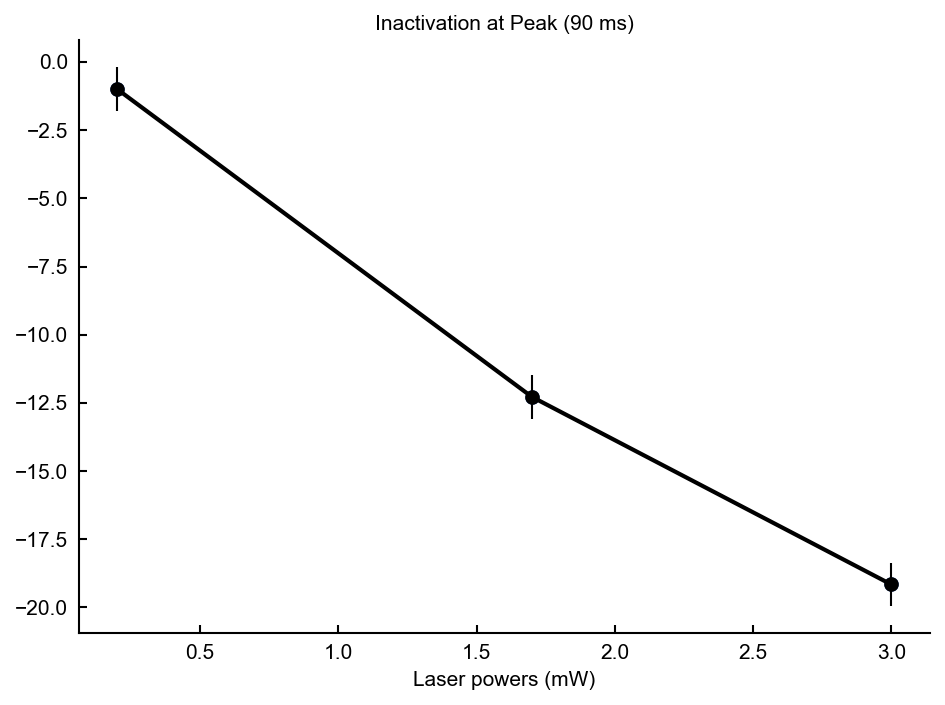

In [27]:
data=dataSt725_AL33;mouse='al33';date='7/25';galvoX=0;galvoY=3;y=400;x=170;n_samples=500

powers = np.unique(data.laserPowers)
pxPowers = []
timestamps = np.linspace(-0.3, 1, n_samples)*1000

#changes per mouse!!
galvoXTr=np.argwhere(data.galvoX==galvoX).ravel()
galvoYTr=np.argwhere(data.galvoY==galvoY).ravel()
loc=np.intersect1d(galvoXTr,galvoYTr)

pixel_ix = np.ravel_multi_index((y, x), (data.py, data.px))
for iP, power in enumerate([0.2,1.7,3]):
    pwTrs = np.argwhere(data.laserPowers == power).ravel()
    theseTrs=np.intersect1d(pwTrs,loc)
    onTimes = data.laserOn[theseTrs]
    trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
    trs = np.squeeze(np.array(trs))
    
    thisPower = []
    for iT, tr in enumerate(trs):
        wf = data.tToWFManual(tr)
        dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
        dwf = np.array(dwf)
        mov = data.svdSpat[pixel_ix] @ dwf
        thisPower.append(mov)
    thisPower = np.array(thisPower)
    print(len(thisPower))
    pxPowers.append(thisPower)

pixelInterp = scipy.interpolate.interp1d(timestamps, pxPowers, axis=2, fill_value='extrapolate')

time90 = pixelInterp(90)

timeMean = np.mean(time90, axis=1)
plt.plot([0.2,1.7,3],timeMean,'-o',c='k',lw=2)
plt.errorbar([0.2,1.7,3],timeMean,yerr=.8,c='k')
plt.scatter([0.2,1.7,3],timeMean)
plt.xlabel("Laser powers (mW)")
plt.title("Inactivation at Peak (90 ms)")

### panels, and specify day

In [ ]:
data=dataSt627_AL33;pow=1.5;x=250;y=350;n_samples=650

In [ ]:
# lens = [0.1, 0.2, 1, 2]
lens = np.unique(dataSt625_AB32.pulseLengths)
colors=plt.cm.Blues(np.linspace(0,1,6))
power=1.5
pws=np.argwhere(data.laserPowers==power).ravel()
pxLen = []
timestamps = np.linspace(-0.3, 4, n_samples)

pixel_ix = np.ravel_multi_index((y, x), (data.py, data.px))
for iP, len in enumerate(lens):
    lenTrs = np.argwhere(data.pulseLengths == len).ravel()
    theseTrs=np.intersect1d(lenTrs,pws)
    onTimes = data.laserOn[theseTrs]
    trs = [np.linspace(-.3+on, 4+on, n_samples) for on in onTimes]
    trs = np.squeeze(np.array(trs))
    
    thisLen = []
    for iT, tr in enumerate(trs):
        wf = data.tToWFManual(tr)
        dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
        dwf = np.array(dwf)
        mov = data.svdSpat[pixel_ix] @ dwf
        thisLen.append(mov)
    thisLen = np.array(thisLen)
    pxLen.append(thisLen)
pxLen=np.array(pxLen)

f = plt.figure(figsize=(20, 5))
gs = mpl.gridspec.GridSpec(2,4)

for i,iL in enumerate(pxLen):
    ax = plt.subplot(gs[i])
    ax.plot(timestamps,np.mean(iL,axis=0),color='blue',lw=2)
    ax.axvspan(0,lens[i],color='gray',alpha=.2,lw=0,label='_nolegend_')
    plt.title(f'{lens[i]}s duration')
    plt.ylim([-40,40])

In [ ]:
pws

In [ ]:
trs

In [ ]:
powerDep3Pow(ax,data=dataSt726_AB32,date=date_set,mouse=mouse_set,galvoX=0,galvoY=4,n_samples=500,x=250,y=350)
plt.ylim([-30,60])

In [ ]:
data=dataSt726_AB32;galvoX=0;galvoY=4;power=1.7
power = np.argwhere(data.laserPowers==power).ravel() 
galvoXTrs=np.argwhere(data.galvoX==galvoX).ravel() #change for loc stim
galvoYTrs=np.argwhere(data.galvoY==galvoY).ravel() #change for loc stim
len = np.argwhere(data.pulseLengths==.1).ravel()

#find trials
pixel_ix = np.ravel_multi_index((400, 230), (data.py, data.px))
px = np.intersect1d(galvoYTrs,galvoXTrs)
lenx = np.intersect1d(px,len)
theseTrs=np.intersect1d(lenx,power)
allVideos=[]

onTimes = data.laserOn[theseTrs]
trs = [np.linspace(-0.1+on, 1+on, 100) for on in onTimes]
trs = np.squeeze(np.array(trs))

wf = np.mean(data.tToWf(trs), axis=0)

dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
dwf = np.array(dwf)
mov = data.svdSpat @ dwf
mov = mov.reshape(data.px,data.py,-1)
mov = np.array(mov)

In [ ]:
plt.imshow(vid[:,:,8],cmap='bwr',clim=np.percentile(vid[:,:,10],(2,99.9)))
plt.scatter(x=250,y=350)

In [ ]:
n_cols=5;n_rows=10
f = plt.figure(figsize=(n_cols*2, n_rows*2))
gs = mpl.gridspec.GridSpec(n_rows, n_cols)
for i in range(50):
    ax = plt.subplot(gs[i])
    brain=plt.imshow(mov[:, :, i*2], clim = np.percentile(mov, (2, 99.9)), cmap='bwr')
    plt.colorbar(brain)

In [ ]:
def stimDepPow(ax,data,mouse,day,pow,y,x,pre=-.3,length=4,n_samples=650):
    '''
    graph response to all lengths
    '''
    lens = np.unique(data.pulseLengths)
    colors=plt.cm.Blues(np.linspace(0,1,lens.size))
    power=pow
    pws=np.argwhere(data.laserPowers==power).ravel()
    pxLen = []
    timestamps = np.linspace(pre, length, n_samples)

    pixel_ix = np.ravel_multi_index((y, x), (data.py, data.px))
    for iP, len in enumerate(lens):
        lenTrs = np.argwhere(data.pulseLengths == len).ravel()
        theseTrs=np.intersect1d(lenTrs,pws)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(pre+on, length+on, n_samples) for on in onTimes]
        trs = np.squeeze(np.array(trs))
        
        thisLen = []
        for iT, tr in enumerate(trs):
            wf = data.tToWFManual(tr)
            dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
            dwf = np.array(dwf)
            mov = data.svdSpat[pixel_ix] @ dwf
            thisLen.append(mov)
        thisLen = np.array(thisLen)
        pxLen.append(thisLen)
    pxLen=np.array(pxLen)

    for i,iP in enumerate(pxLen):
        plt.plot(timestamps, np.mean(iP,axis=0),color=colors[i])
    # ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(200))
    plt.xlabel('Time (ms)')
    plt.ylabel('$\Delta F$/F')
    plt.title(f'Temporal Resolution mouse: {mouse} day: {day}')


In [ ]:
def stimDepPowMod(ax,data,mouse,day,y,x,pow,length=4,pre=-0.3,n_samples=650,lenList=[0.025,.5,2]):
    '''
    graph repsonse to chosen lengths
    '''
    power=pow
    pws=np.argwhere(data.laserPowers==power).ravel()
    lens = np.array(lenList)
    colors=plt.cm.Blues(np.linspace(0,1,lens.size))
    pxLens = []
    timestamps = np.linspace(pre, length, n_samples)

    pixel_ix = np.ravel_multi_index((y, x), (data.py, data.px))

    for iP, len in enumerate(lens):
        lenTrs = np.argwhere(data.pulseLengths == len).ravel()
        theseTrs=np.intersect1d(lenTrs,pws)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(pre+on, length+on, n_samples) for on in onTimes]
        trs = np.squeeze(np.array(trs))
        
        thisLen = []
        for iT, tr in enumerate(trs):
            wf = data.tToWFManual(tr)
            dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
            dwf = np.array(dwf)
            mov = data.svdSpat[pixel_ix] @ dwf
            thisLen.append(mov)
        thisLen = np.array(thisLen)
        pxLens.append(thisLen)
        
    for c,iP in enumerate(pxLens):
        plt.plot(timestamps, np.mean(iP, axis=0),linewidth=2,color=colors[c])
        plt.fill_between(timestamps, \
                np.mean(iP, axis=0)-scipy.stats.sem(iP,axis=0),\
                np.mean(iP,axis=0)+scipy.stats.sem(iP,axis=0), color=colors[c], label='_nolegend_',alpha=.3,linewidth=0)
    plt.legend(lens, loc='upper right',bbox_to_anchor=(1.2,1))
    plt.xlabel('Time (ms)')
    plt.title(f'Temporal effects mouse: {mouse} day: {day}')
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(200))
    plt.ylim(ylim)

In [ ]:
def stimDepQuant():
    pass

Text(0.5, 1.0, 'Time brain remains inactivated')

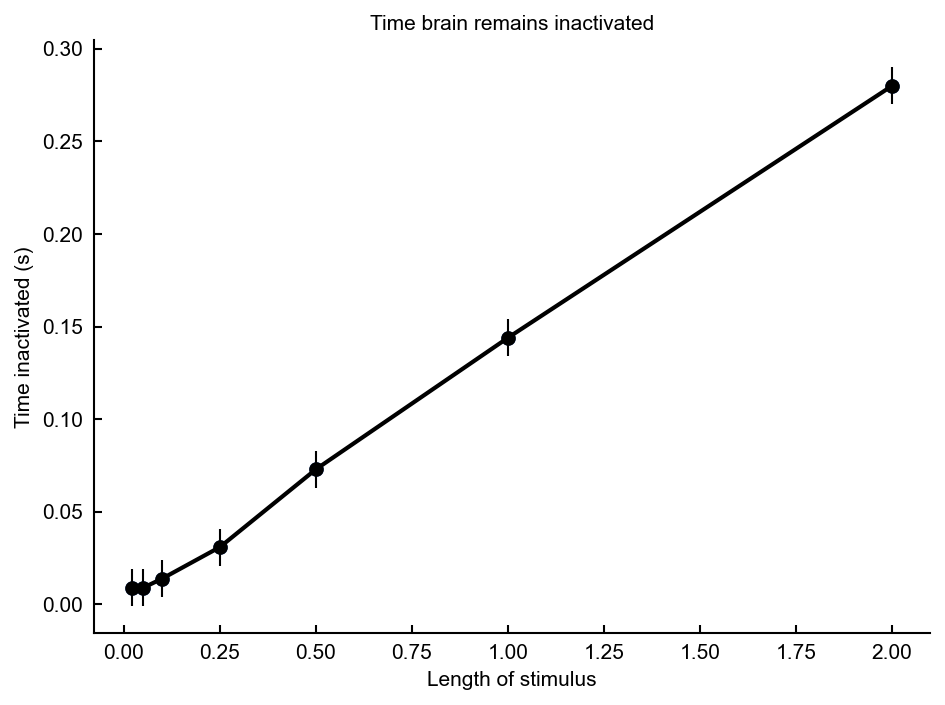

In [130]:
data=dataSt729_AL34
lens = np.unique(dataSt729_AL34.pulseLengths)
power=1.5
pws=np.argwhere(data.laserPowers==power).ravel()
pxLen = []
timestamps = np.linspace(-0.3, 4, n_samples)

time = []
pixel_ix = np.ravel_multi_index((y, x), (data.py, data.px))
for iP, len in enumerate(lens):
    lenTrs = np.argwhere(data.pulseLengths == len).ravel()
    theseTrs=np.intersect1d(lenTrs,pws)
    onTimes = data.laserOn[theseTrs]
    trs = [np.linspace(-.3+on, 4+on, n_samples) for on in onTimes]
    trs = np.squeeze(np.array(trs))
    
    wf = np.mean(data.tToWFManual(trs),axis=0) #avg over trials
    mov = data.svdSpat[pixel_ix] @ wf.T #add back in spatial -- this now gives us F(t)
    meanimg = data.meanImage.reshape(560,560,-1)
    avg = meanimg[y, x] #find the mean of the pixel we are interested in - F0
    mov_mean_dff = (mov)/avg #df/f -- F(t) - F0 / F0
    peak = np.min(mov_mean_dff)
    halfpeak=peak/2
    tf = [i<halfpeak for i in mov_mean_dff]
    deac = mov_mean_dff[tf]
    time.append(deac.shape[0]*(1/1000))


plt.plot(lens,time,'-o',c='k',lw=2)
plt.errorbar(lens,time,yerr=.01,c='k')
plt.scatter(lens,time)
plt.xlabel("Length of stimulus")
plt.ylabel("Time inactivated (s)")
plt.title('Time brain remains inactivated')

In [122]:
type(deac)

numpy.ndarray

In [ ]:
f = plt.figure(figsize=(14, 5))
gs = mpl.gridspec.GridSpec(2,3)
pow=1.7

ax = plt.subplot(gs[0])
stimDepPow(ax,data=data_set,mouse=mouse_set,day=date_set,pow=pow,y=350,x=350)

# ax = plt.subplot(gs[1])
# stimDepPowMod(ax,data=data_set,mouse=mouse,day=date,pow=pow,lenList=[0.025,.5,1,2],y=350,x=350)

f.tight_layout()

### testing testing 1,2,3

#### one panel for each length
- goal - see the avg response to each laser length

##### 523 data

In [ ]:
lens = np.unique(dataSt523.pulseLengths)
power=0.7 #depends on experiment!
pws=np.argwhere(dataSt523.laserPowers==power).ravel()
pixel = (150, 450)
pxLen = []
n_samples = 650
start=-.3
stop=3
timestamps = np.linspace(start, stop, n_samples)


pixel_ix = np.ravel_multi_index((410, 170), (dataSt523.py, dataSt523.px))
for iP, len in enumerate(lens):
    #find the trials for this length
    lenTrs = np.argwhere(dataSt523.pulseLengths == len).ravel()
    theseTrs=np.intersect1d(lenTrs,pws)
    onTimes = laserOn521[theseTrs]
    #make trial times
    trs = [np.linspace(start+on, stop+on, n_samples) for on in onTimes]
    trs = np.squeeze(np.array(trs))
    
    thisLen = []
    for iT, tr in enumerate(trs):
        wf = dataSt523.tToWf(tr)
        dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
        dwf = np.array(dwf)
        mov = dataSt523.spatial[pixel_ix] @ dwf
        thisLen.append(mov)
    thisLen = np.array(thisLen) #the activity for this length
    pxLen.append(thisLen) #appending to an array for all the lengths
    
pxLen=np.array(pxLen)
f = plt.figure(figsize=(15, 5))
gs = mpl.gridspec.GridSpec(3,3) #3 rows, 3 columns

for iLen,whichLen in enumerate(pxLen):
    ax = plt.subplot(gs[iLen])
    ax.plot(timestamps, np.mean(whichLen,axis=0),color='k') #plotting mean across the trials of that length
    ax.set_title(f'len = {lens[iLen]} power = {power/2.777778:.02f}')
    ax.axvspan(0,lens[iLen],color='gray',alpha=.2,lw=0,label='_nolegend_')
    ax.set_ylim([-70,70])
f.tight_layout()

##### 5/21

In [ ]:
lens = np.unique(pulseLengths521)
power=0.7 #depends on experiment!
pws=np.argwhere(laserPowers521==power).ravel()
pxLen = []
n_samples = 650
start=-.3
stop=3
timestamps = np.linspace(start, stop, n_samples)


pixel_ix = np.ravel_multi_index((410, 170), (py521, px521))
for iP, len in enumerate(lens):
    #find the trials for this length
    lenTrs = np.argwhere(pulseLengths521 == len).ravel()
    theseTrs=np.intersect1d(lenTrs,pws)
    onTimes = laserOn521[theseTrs]
    #make trial times
    trs = [np.linspace(start+on, stop+on, n_samples) for on in onTimes]
    trs = np.squeeze(np.array(trs))
    
    thisLen = []
    for iT, tr in enumerate(trs):
        wf = tToWf521(tr)
        dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
        dwf = np.array(dwf)
        mov = spatial521[pixel_ix] @ dwf
        thisLen.append(mov)
    thisLen = np.array(thisLen) #the activity for this length
    pxLen.append(thisLen[:25]) #appending to an array for all the lengths

pxLen=np.array(pxLen)
f = plt.figure(figsize=(15, 5))
gs = mpl.gridspec.GridSpec(3,3) #3 rows, 3 columns

for iLen,whichLen in enumerate(pxLen):
    ax = plt.subplot(gs[iLen])
    ax.plot(timestamps, np.mean(whichLen,axis=0),color='k') #plotting mean across the trials of that length
    ax.set_title(f'len = {lens[iLen]} power = {power/2.777778:.02f}')
    ax.axvspan(0,lens[iLen],color='gray',alpha=.2,lw=0,label='_nolegend_')
    ax.set_ylim([-80,80])
f.tight_layout()

In [ ]:
dwf.shape

In [ ]:
spatial521[pixel_ix].shape

In [ ]:
dwf.shape

#### check the pixel location

In [ ]:
#check your pixel locations are good
power_pick = .7
n_samples=650
timestamps=np.linspace(-.3,1,n_samples)*1000
power = np.argwhere(dataSt523.laserPowers==power_pick).ravel() 
# galvoX=np.argwhere(dataSt523.galvoX==0).ravel() #change for loc stim
# galvoY=np.argwhere(dataSt523.galvoY==2.5).ravel() #change for loc stim

#find trials
# px = np.intersect1d(galvoY,galvoX)
# theseTrs=np.intersect1d(px,power)
allVideos=[]
#make videos for trials
for iT, tr in enumerate(power):
    startTime = dataSt523.laserOn[tr] - .3
    endTime = dataSt523.laserOn[tr] + 1

    trial_time = np.linspace(startTime, endTime, 100)
    trial_activity = dataSt523.tToWf(trial_time)
    
    dwf = [np.diff(i, prepend=i[0]) for i in trial_activity.T]
    dwf = np.array(dwf)

    #make avg brain
    video=dataSt523.spatial@dwf
    video = video.reshape(560,560,-1)
    allVideos.append(video)
allVideos=np.array(allVideos)
allVideosMean=np.mean(allVideos,axis=0)

In [ ]:
dwf.shape

In [ ]:
dataSt523.spatial.shape

In [ ]:
plt.imshow(allVideosMean[:,:,18],cmap='bwr')
plt.scatter(x=170,y=410,color='orange')

#### create 30 panels for all trials of each stim length
- goal - to see if theres something wrong with my trials
- new goal - investigate saturation

In [ ]:
f = plt.figure(figsize=(20,20))
gs = mpl.gridspec.GridSpec(5,6) #all 30 (25) panels

#presets and needs
power=1.7
len=.25
pixel_ix = np.ravel_multi_index((410, 170), (dataSt719_AB32.py, dataSt719_AB32.px))
n_samples = 500
start=-.3
stop=3
timestamps = np.linspace(start, stop, n_samples)

#finding trs
pwTrs=np.argwhere(dataSt719_AB32.laserPowers==power).ravel()
lenTrs = np.argwhere(dataSt719_AB32.pulseLengths == len).ravel()
theseTrs=np.intersect1d(lenTrs,pwTrs)
onTimes = dataSt719_AB32.laserOn[theseTrs]
trs = [np.linspace(start+on, stop+on, n_samples) for on in onTimes]
trs = np.squeeze(np.array(trs))

#find times and get
for iT, tr in enumerate(trs):
    wf = dataSt719_AB32.tToWf(tr)
    dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
    dwf = np.array(dwf)
    mov = dataSt719_AB32.spatial[pixel_ix] @ dwf
    mov=np.array(mov)

    #set up axis
    ax=plt.subplot(gs[iT])
    ax.plot(timestamps, mov, linewidth=2,color='k')
    ax.axvspan(0,len,color='gray',alpha=.2,lw=0,label='_nolegend_')
    ax.set_title(f'Trial {iT}')
    ax.set_xlabel('time (s)')
    ax.set_ylabel('activity df/f')
    ax.set_ylim([-150,150])
    f.tight_layout()

#### rolling avg

taking first 5, then stepping one and taking next five, then stepping again and tkaing next five, and so forth
for 25 trials, should step through first 20?

In [ ]:
np.unique(laserPowers521)

In [ ]:
np.unique(pulseLengths521)

In [ ]:

#presets and needs
power=1.5
len=0.02
pixel_ix = np.ravel_multi_index((410, 170), (py620, px620))
n_samples = 500
start=-.1
stop=.8
timestamps = np.linspace(start, stop, n_samples)

#finding trs
pwTrs=np.argwhere(laserPowers620==power).ravel()
lenTrs = np.argwhere(pulseLengths620 == len).ravel()
theseTrs=np.intersect1d(lenTrs,pwTrs)
onTimes = laserOn620[theseTrs]
trs = [np.linspace(start+on, stop+on, n_samples) for on in onTimes]
trs = np.squeeze(np.array(trs))

thisLen=[]
#find times and get
for iT, tr in enumerate(trs):
    wf = tToWf620(tr)
    dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
    dwf = np.array(dwf)
    mov = spatial620[pixel_ix] @ dwf
    mov=np.array(mov)
    thisLen.append(mov)
thisLen=np.array(thisLen)

#messing with the averaging

f=plt.figure(figsize=(25,15))
gs=mpl.gridspec.GridSpec(5,5)

for i in range(20):
    thisMean=np.mean(thisLen[i:(i+5)],axis=0)
    thisMeanFiltered = gaussian_filter1d(thisMean, sigma=2)
    ax=plt.subplot(gs[i])
    ax.plot(timestamps,thisMeanFiltered,lw=2,color='k')
    ax.set_xlabel('time')
    ax.set_ylabel('activity df/f')
    ax.set_title(f'trials {i} - {i+5}',fontsize=15)
    ax.axvspan(0,len,color='gray',alpha=.2,lw=0,label='_nolegend_')
f.tight_layout()

#### are these high trial-by-trial values normal?

In [ ]:
np.unique(dataOp621_AB.laserPowers)

In [ ]:
f = plt.figure(figsize=(20,20))
gs = mpl.gridspec.GridSpec(10,6) 

#presets and needs
power=.7
pixel_ix = np.ravel_multi_index((410, 170), (dataOp621_AB.py, dataOp621_AB.px))
n_samples = 500
start=-.3
stop=3
timestamps = np.linspace(start, stop, n_samples)

#finding trs
pwTrs=np.argwhere(dataOp621_AB.laserPowers==power).ravel()
galvoX=np.argwhere(dataOp621_AB.galvoX==0).ravel()
galvoY=np.argwhere(dataOp621_AB.galvoY==4).ravel()
loc=np.intersect1d(galvoX,galvoY).ravel()

theseTrs=np.intersect1d(loc,pwTrs)
onTimes = dataOp621_AB.laserOn[theseTrs]
trs = [np.linspace(start+on, stop+on, n_samples) for on in onTimes]
trs = np.squeeze(np.array(trs))

#find times and get
for iT, tr in enumerate(trs):
    wf = dataOp621_AB.tToWf(tr)
    dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
    dwf = np.array(dwf)
    mov = dataOp621_AB.spatial[pixel_ix] @ dwf
    mov=np.array(mov)

    #set up axis
    ax=plt.subplot(gs[iT])
    ax.plot(timestamps, mov, linewidth=2,color='k')
    ax.axvspan(0,.1,color='gray',alpha=.2,lw=0,label='_nolegend_')
    ax.set_title(f'Trial {iT}')
    ax.set_xlabel('time (s)')
    ax.set_ylabel('activity df/f')
    ax.set_ylim([-200,200])

    f.tight_layout()

In [ ]:
data=dataSt719_AB32;galvoX=0;galvoY=3.3;power=1.7
power = np.argwhere(data.laserPowers==power).ravel() 
galvoXTrs=np.argwhere(data.galvoX==galvoX).ravel() #change for loc stim
galvoYTrs=np.argwhere(data.galvoY==galvoY).ravel() #change for loc stim
len = np.argwhere(data.pulseLengths==.1).ravel()

#find trials
pixel_ix = np.ravel_multi_index((400, 230), (data.py, data.px))
px = np.intersect1d(galvoYTrs,galvoXTrs)
lenx = np.intersect1d(px,len)
theseTrs=np.intersect1d(lenx,power)
allVideos=[]

onTimes = data.laserOn[theseTrs]
trs = [np.linspace(-0.1+on, 1+on, 100) for on in onTimes]
trs = np.squeeze(np.array(trs))

wf = np.mean(data.tToWf(trs), axis=0)

dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
dwf = np.array(dwf)
mov = data.svdSpat[pixel_ix] @ dwf

In [ ]:
plt.plot(mov)

In [ ]:
n_cols=5;n_rows=10
f = plt.figure(figsize=(n_cols*2, n_rows*2))
gs = mpl.gridspec.GridSpec(n_rows, n_cols)
for i in range(50):
    ax = plt.subplot(gs[i])
    brain=plt.imshow(vid[:, :, i*2], clim = np.percentile(vid, (2, 99.9)), cmap='bwr')
    plt.colorbar(brain)

## df vs deconv

In [ ]:
def dfpowerDep3Pow(ax,data,mouse,date,galvoX,galvoY,y,x,n_samples=650,pows=[0.2,1.7,3]):
    data=dataOp729_AB32;date='7/29';mouse='AB32';y=350;x=200;galvoX=0;galvoY=4;n_samples=500;pows=[0.2,1.7,3]

    colors=['deepskyblue','dodgerblue','mediumblue']
    pxPowers = []
    timestamps = np.linspace(-0.3, 1, n_samples)*1000
    # x=240
    #changes per mouse
    galvoXTr=np.argwhere(data.galvoX==galvoX).ravel()
    galvoYTr=np.argwhere(data.galvoY==galvoY).ravel()
    loc=np.intersect1d(galvoXTr,galvoYTr)

    pixel_ix = np.ravel_multi_index((y,x), (data.py, data.px))
    for iP, power in enumerate(pows):
        pwTrs = np.argwhere(data.laserPowers == power).ravel()
        theseTrs=np.intersect1d(pwTrs,loc)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
        trs = np.squeeze(np.array(trs))
        
        thisPower = []
        wf = np.mean(data.tToWFManual(trs),axis=0) #avg over trials
        mov = data.svdSpat[pixel_ix] @ wf.T #add back in spatial -- this now gives us F(t)
        meanimg = data.meanImage.reshape(560,560,-1)
        avg = meanimg[y, x] #find the mean of the pixel we are interested in - F0
        mov_mean_dff = (mov)/avg #df/f -- F(t) - F0 / F0
        thisPower = np.array(mov_mean_dff)
        pxPowers.append(thisPower)

    for c,iP in enumerate(pxPowers):
        plt.plot(timestamps, iP,linewidth=2,color=colors[c])
        plt.fill_between(timestamps, \
                iP-scipy.stats.sem(iP,axis=0),\
                iP+scipy.stats.sem(iP,axis=0), color=colors[c], label='_nolegend_',alpha=.3,linewidth=0)
        
    plt.legend(['0.07 mW', '0.63 mW', '1.1 mW'], loc='upper right',bbox_to_anchor=(1.2,1))
    plt.xlabel('Time (ms)')
    plt.ylabel('Brain Activity df/f')
    plt.title(f'Inactivation 3 Powers mouse {mouse} {date}')
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(200))
    plt.axvspan(0,100,color='gray',alpha=.2,lw=0,label='_nolegend_')


In [ ]:
def dfpowerDepAllPow(ax,data,mouse,date,galvoX,galvoY,y,x,n_samples=650):
    powers = np.unique(data.laserPowers)
    colors=plt.cm.Blues(np.linspace(0,1,powers.shape[0]))
    pxPowers = []
    timestamps = np.linspace(-0.3, 1, n_samples)*1000

    #this depends on mouse (and maybe day) !!!!!
    galvoXTr=np.argwhere(data.galvoX==galvoX).ravel()
    galvoYTr=np.argwhere(data.galvoY==galvoY).ravel()
    loc=np.intersect1d(galvoXTr,galvoYTr)

    pixel_ix = np.ravel_multi_index((y, x), (data.py, data.px))
    for iP, power in enumerate(powers):
        pwTrs = np.argwhere(data.laserPowers == power).ravel()
        theseTrs=np.intersect1d(pwTrs,loc)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
        trs = np.squeeze(np.array(trs))
        
        thisPower = []
        wf = np.mean(data.tToWFManual(trs),axis=0) #avg over trials
        mov = data.svdSpat[pixel_ix] @ wf.T #add back in spatial -- this now gives us F(t)
        meanimg = data.meanImage.reshape(560,560,-1)
        avg = meanimg[y, x] #find the mean of the pixel we are interested in - F0
        mov_mean_dff = (mov)/avg #df/f -- F(t) - F0 / F0
        thisPower = np.array(mov_mean_dff)
        pxPowers.append(thisPower)

    for i,iP in enumerate(pxPowers):
        plt.plot(timestamps,iP,color=colors[i])
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(200))
    plt.xlabel('time (ms)')
    plt.title('Inactivation All Powers')

In [ ]:
def dfpowerQuant(ax,data,y,x,galvoX,galvoY,n_samples=650):
    powers = np.unique(data.laserPowers)
    pxPowers = []
    timestamps = np.linspace(-0.3, 1, n_samples)*1000

    #changes per mouse!!
    galvoXTr=np.argwhere(data.galvoX==galvoX).ravel()
    galvoYTr=np.argwhere(data.galvoY==galvoY).ravel()
    loc=np.intersect1d(galvoXTr,galvoYTr)

    pixel_ix = np.ravel_multi_index((y, x), (data.py, data.px))
    for iP, power in enumerate(powers):
        pwTrs = np.argwhere(data.laserPowers == power).ravel()
        theseTrs=np.intersect1d(pwTrs,loc)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
        trs = np.squeeze(np.array(trs))
        
        thisPower = []
        wf = np.mean(data.tToWFManual(trs),axis=0) #avg over trials
        mov = data.svdSpat[pixel_ix] @ wf.T #add back in spatial -- this now gives us F(t)
        meanimg = data.meanImage.reshape(560,560,-1)
        avg = meanimg[y, x] #find the mean of the pixel we are interested in - F0
        mov_mean_dff = (mov)/avg #df/f -- F(t) - F0 / F0
        thisPower = np.array(mov_mean_dff)
        pxPowers.append(thisPower)

    pixelInterp = scipy.interpolate.interp1d(timestamps, pxPowers, axis=1, fill_value='extrapolate')

    time90 = pixelInterp(90)

    # timeMean = np.mean(time90, axis=0)
    plt.plot(powers,time90,'-o',c='k',lw=2)
    plt.errorbar(powers,time90,yerr=.01,c='k')
    plt.scatter(powers,time90)
    plt.xlabel("Laser powers (mW)")
    plt.title('Peak inactivation')

In [ ]:
gX=0
gY=4

f = plt.figure(figsize=(12, 3.5))
gs = mpl.gridspec.GridSpec(1, 3)

ax = plt.subplot(gs[0])
dfpowerDep3Pow(ax,data=dataOp729_AB32,date='7/29',mouse='AB32',y=350,x=200,galvoX=gX,galvoY=gY,n_samples=500,pows=[0.2,1.7,3])

ax = plt.subplot(gs[1])
dfpowerDepAllPow(ax,data=dataOp729_AB32,date='7/29',mouse='AB32',y=350,x=200,galvoX=gX,galvoY=gY,n_samples=500)

ax = plt.subplot(gs[2])
dfpowerQuant(ax,data=dataOp729_AB32,galvoX=gX,galvoY=gY,y=350,x=200,n_samples=500)
plt.ylim([-0.05,0.05])

f.tight_layout()

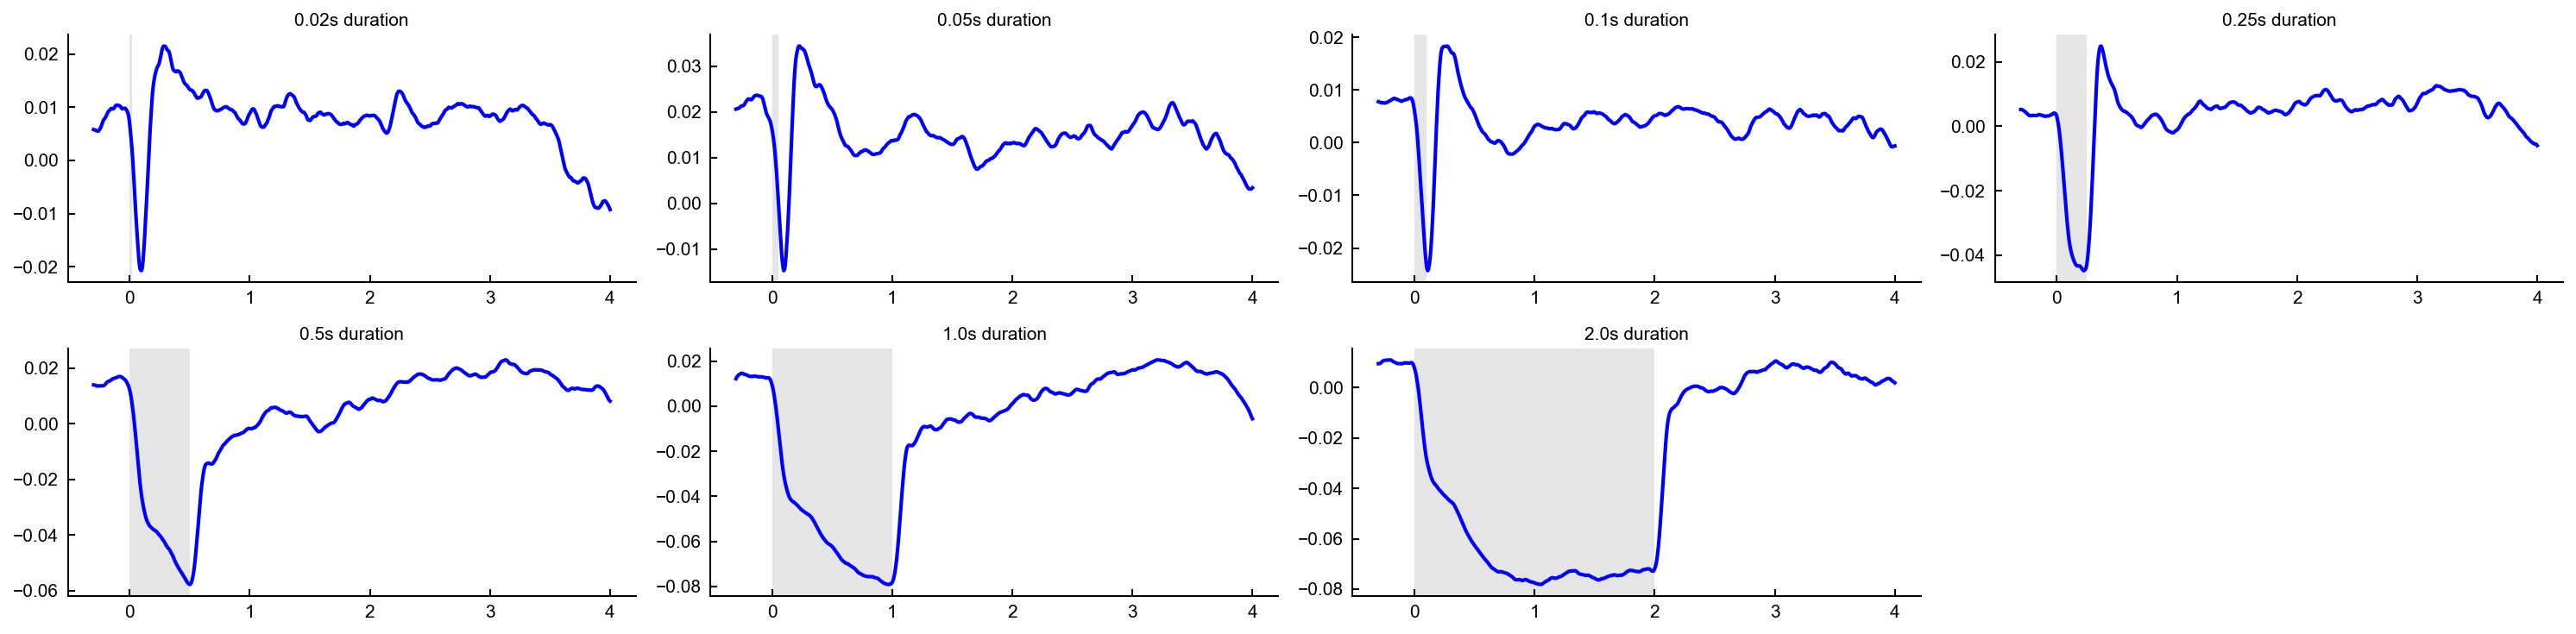

In [104]:
data=dataSt729_AL34
lens = np.unique(data.pulseLengths)
colors=plt.cm.Blues(np.linspace(0,1,lens.size))
power=1.7
pws=np.argwhere(data.laserPowers==power).ravel()
pxLen = []
timestamps = np.linspace(-0.3, 4, n_samples)

pixel_ix = np.ravel_multi_index((y, x), (data.py, data.px))
for iP, len in enumerate(lens):
    lenTrs = np.argwhere(data.pulseLengths == len).ravel()
    theseTrs=np.intersect1d(lenTrs,pws)
    onTimes = data.laserOn[theseTrs]
    trs = [np.linspace(-.3+on, 4+on, n_samples) for on in onTimes]
    trs = np.squeeze(np.array(trs))
    
    wf = np.mean(data.tToWFManual(trs),axis=0) #avg over trials
    mov = data.svdSpat[pixel_ix] @ wf.T #add back in spatial -- this now gives us F(t)
    meanimg = data.meanImage.reshape(560,560,-1)
    avg = meanimg[y, x] #find the mean of the pixel we are interested in - F0
    mov_mean_dff = (mov)/avg #df/f -- F(t) - F0 / F0
    pxLen.append(mov_mean_dff)
pxLen=np.array(pxLen)

f = plt.figure(figsize=(20, 5))
gs = mpl.gridspec.GridSpec(2,4)

for i,iL in enumerate(pxLen):
    ax = plt.subplot(gs[i])
    ax.plot(timestamps,iL,color='blue',lw=2)
    ax.axvspan(0,lens[i],color='gray',alpha=.2,lw=0,label='_nolegend_')
    plt.title(f'{lens[i]}s duration')

In [ ]:
trs.shape

In [ ]:
thisPower=[]
wf = np.mean(data.tToWFManual(trs),axis=0)
dwf = [np.diff(i, prepend=i[0]) for i in wf.T] 
dwf = np.array(dwf)
mov = data.svdSpat @ dwf
mov = mov.reshape(560,560,-1)
videoROI = mov[300:400, 100:200] # ROI vid with average activity
avgOverRoi=np.mean(videoROI,axis=(0,1))

## ROI

In [ ]:
def powerDep3Pow(ax,data,mouse,date,galvoX,galvoY,y,x,n_samples=650,pows=[0.2,1.7,3],ylim=[-40,40]):
    colors=['deepskyblue','dodgerblue','mediumblue']
    pxPowers = []
    timestamps = np.linspace(-0.3, 1, n_samples)*1000
    # x=240
    #changes per mouse
    galvoXTr=np.argwhere(data.galvoX==galvoX).ravel()
    galvoYTr=np.argwhere(data.galvoY==galvoY).ravel()
    loc=np.intersect1d(galvoXTr,galvoYTr)

    pixel_ix = np.ravel_multi_index((y,x), (data.py, data.px))
    for iP, power in enumerate(pows):
        pwTrs = np.argwhere(data.laserPowers == power).ravel()
        theseTrs=np.intersect1d(pwTrs,loc)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
        trs = np.squeeze(np.array(trs))
        
        wf = np.mean(data.tToWFManual(trs),axis=0)
        dwf = [np.diff(i, prepend=i[0]) for i in wf.T] 
        dwf = np.array(dwf)
        mov = data.svdSpat @ dwf
        mov = mov.reshape(560,560,-1)
        videoROI = mov[320:450, 100:200] # ROI vid with average activity
        avgOverRoi=np.mean(videoROI,axis=(0,1))
        pxPowers.append(avgOverRoi)

    for c,iP in enumerate(pxPowers):
        plt.plot(timestamps, iP,linewidth=2,color=colors[c])
        plt.fill_between(timestamps, \
                iP-scipy.stats.sem(iP,axis=0),\
                iP+scipy.stats.sem(iP,axis=0), color=colors[c], label='_nolegend_',alpha=.3,linewidth=0)
        
    plt.legend(['0.07 mW', '0.63 mW', '1.1 mW'], loc='upper right',bbox_to_anchor=(1.2,1))
    plt.xlabel('Time (ms)')
    plt.ylabel('Brain Activity df')
    plt.title(f'Inactivation 3 Powers mouse {mouse} {date}')
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(200))
    plt.axvspan(0,100,color='gray',alpha=.2,lw=0,label='_nolegend_')
    plt.ylim(ylim)


In [ ]:
def powerDepAllPow(ax,data,mouse,date,galvoX,galvoY,y,x,n_samples=650):
    powers = np.unique(data.laserPowers)
    colors=plt.cm.Blues(np.linspace(0,1,powers.shape[0]))
    pxPowers = []
    timestamps = np.linspace(-0.3, 1, n_samples)*1000

    #this depends on mouse (and maybe day) !!!!!
    galvoXTr=np.argwhere(data.galvoX==galvoX).ravel()
    galvoYTr=np.argwhere(data.galvoY==galvoY).ravel()
    loc=np.intersect1d(galvoXTr,galvoYTr)

    pixel_ix = np.ravel_multi_index((y, x), (data.py, data.px))
    for iP, power in enumerate(powers):
        pwTrs = np.argwhere(data.laserPowers == power).ravel()
        theseTrs=np.intersect1d(pwTrs,loc)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
        trs = np.squeeze(np.array(trs))
        
        wf = np.mean(data.tToWFManual(trs),axis=0)
        dwf = [np.diff(i, prepend=i[0]) for i in wf.T] 
        dwf = np.array(dwf)
        mov = data.svdSpat @ dwf
        mov = mov.reshape(560,560,-1)
        videoROI = mov[320:450, 100:200] # ROI vid with average activity
        avgOverRoi=np.mean(videoROI,axis=(0,1))
        pxPowers.append(avgOverRoi)

    for i,iP in enumerate(pxPowers):
        plt.plot(timestamps,iP,color=colors[i])
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(200))
    plt.xlabel('time (ms)')
    plt.title('Inactivation All Powers')

In [ ]:
def powerQuant(ax,data,y,x,galvoX,galvoY,n_samples=650):
    powers = np.unique(data.laserPowers)
    pxPowers = []
    timestamps = np.linspace(-0.3, 1, n_samples)*1000

    #changes per mouse!!
    galvoXTr=np.argwhere(data.galvoX==galvoX).ravel()
    galvoYTr=np.argwhere(data.galvoY==galvoY).ravel()
    loc=np.intersect1d(galvoXTr,galvoYTr)

    pixel_ix = np.ravel_multi_index((y, x), (data.py, data.px))
    for iP, power in enumerate(powers):
        pwTrs = np.argwhere(data.laserPowers == power).ravel()
        theseTrs=np.intersect1d(pwTrs,loc)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
        trs = np.squeeze(np.array(trs))
        
        wf = np.mean(data.tToWFManual(trs),axis=0)
        dwf = [np.diff(i, prepend=i[0]) for i in wf.T] 
        dwf = np.array(dwf)
        mov = data.svdSpat @ dwf
        mov = mov.reshape(560,560,-1)
        videoROI = mov[320:450, 100:200] # ROI vid with average activity
        avgOverRoi=np.mean(videoROI,axis=(0,1))
        pxPowers.append(avgOverRoi)

    pixelInterp = scipy.interpolate.interp1d(timestamps, pxPowers, axis=1, fill_value='extrapolate')

    time90 = pixelInterp(90)

    # timeMean = np.mean(time90, axis=0)
    plt.plot(powers,time90,'-o',c='k',lw=2)
    plt.errorbar(powers,time90,yerr=.01,c='k')
    plt.scatter(powers,time90)
    plt.xlabel("Laser powers (mW)")
    plt.title('Peak inactivation')

In [ ]:
dataset=dataOp729_AB32
mouseset='AL33'
day="7/09/24"
info='PI'

In [ ]:
plt.imshow(dataOp729_AB32.meanImage)
plt.scatter(x=100,y=320)
plt.scatter(x=220,y=450)

In [ ]:
gX=0
gY=4

f = plt.figure(figsize=(12, 3.5))
gs = mpl.gridspec.GridSpec(1, 3)

ax = plt.subplot(gs[0])
powerDep3Pow(ax,data=dataset,date=day,mouse=mouseset,y=350,x=200,galvoX=gX,galvoY=gY,n_samples=500,pows=[0.2,1.7,3])
plt.ylim([-50,70])

ax = plt.subplot(gs[1])
powerDepAllPow(ax,data=dataset,mouse=mouseset,date=day,y=350,x=200,galvoX=gX,galvoY=gY,n_samples=500)
plt.ylim([-50,80])

ax = plt.subplot(gs[2])
powerQuant(ax,data=dataset,galvoX=gX,galvoY=gY,y=350,x=200,n_samples=500)

# f.tight_layout()

## df and ROI

In [36]:
def powerDep3Pow(ax,data,mouse,date,galvoX,galvoY,y,x,width=15,n_samples=650,pows=[0.2,1.7,3],ylim=[-0.1,0.04]):
    colors=['deepskyblue','dodgerblue','mediumblue']
    pxPowers = []
    timestamps = np.linspace(-0.3, 1, n_samples)*1000
    # x=240
    #changes per mouse
    galvoXTr=np.argwhere(data.galvoX==galvoX).ravel()
    galvoYTr=np.argwhere(data.galvoY==galvoY).ravel()
    loc=np.intersect1d(galvoXTr,galvoYTr)

    for iP, power in enumerate(pows):
        pwTrs = np.argwhere(data.laserPowers == power).ravel()
        theseTrs=np.intersect1d(pwTrs,loc)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
        trs = np.squeeze(np.array(trs))
        
        wf = np.mean(data.tToWFManual(trs),axis=0)
        mov = data.svdSpat @ wf.T #add back in spatial -- this now gives us F(t)
        mov = mov.reshape(560,560,-1)
        meanimg = data.meanImage.reshape(560,560,-1)
        avg = meanimg[(y-width):(y+width),(x-width):(x+width)]
        videoROI = mov[(y-width):(y+width),(x-width):(x+width)] # ROI vid with average activity
        mov_mean_dff = videoROI/avg
        avgOverRoi=np.mean(mov_mean_dff,axis=(0,1))
        pxPowers.append(avgOverRoi)

    for c,iP in enumerate(pxPowers):
        plt.plot(timestamps, iP,linewidth=2,color=colors[c])
        plt.fill_between(timestamps, \
                iP-scipy.stats.sem(iP,axis=0),\
                iP+scipy.stats.sem(iP,axis=0), color=colors[c], label='_nolegend_',alpha=.3,linewidth=0)
        
    plt.legend(['0.07 mW', '0.63 mW', '1.1 mW'], loc='upper right',bbox_to_anchor=(1.2,1))
    plt.xlabel('Time (ms)')
    plt.ylabel('Brain Activity df')
    plt.title(f'Inactivation 3 Powers mouse {mouse} {date}')
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(200))
    plt.axvspan(0,100,color='gray',alpha=.2,lw=0,label='_nolegend_')
    plt.ylim(ylim)

In [50]:
def powerDepAllPow(ax,data,mouse,date,galvoX,galvoY,y,x,width=15,n_samples=650,ylim=[-0.1,0.04]):
    powers = np.unique(data.laserPowers)
    colors=plt.cm.Blues(np.linspace(0,1,powers.shape[0]))
    pxPowers = []
    timestamps = np.linspace(-0.3, 1, n_samples)*1000

    #this depends on mouse (and maybe day) !!!!!
    galvoXTr=np.argwhere(data.galvoX==galvoX).ravel()
    galvoYTr=np.argwhere(data.galvoY==galvoY).ravel()
    loc=np.intersect1d(galvoXTr,galvoYTr)

    pixel_ix = np.ravel_multi_index((y, x), (data.py, data.px))
    for iP, power in enumerate(powers):
        pwTrs = np.argwhere(data.laserPowers == power).ravel()
        theseTrs=np.intersect1d(pwTrs,loc)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
        trs = np.squeeze(np.array(trs))
        
        wf = np.mean(data.tToWFManual(trs),axis=0)
        mov = data.svdSpat @ wf.T #add back in spatial -- this now gives us F(t)
        mov = mov.reshape(560,560,-1)
        meanimg = data.meanImage.reshape(560,560,-1)
        avg = meanimg[(y-width):(y+width),(x-width):(x+width)]
        videoROI = mov[(y-width):(y+width),(x-width):(x+width)] # ROI vid with average activity
        mov_mean_dff = videoROI/avg
        avgOverRoi=np.mean(mov_mean_dff,axis=(0,1))
        pxPowers.append(avgOverRoi)

    for i,iP in enumerate(pxPowers):
        plt.plot(timestamps, iP,color=colors[i])
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(200))
    plt.xlabel('time (ms)')
    plt.title('Inactivation All Powers')
    plt.ylim(ylim)


In [48]:
def powerQuant(ax,data,y,x,galvoX,galvoY,width=15,n_samples=650):
    powers = np.unique(data.laserPowers)
    pxPowers = []
    timestamps = np.linspace(-0.3, 1, n_samples)*1000

    #changes per mouse!!
    galvoXTr=np.argwhere(data.galvoX==galvoX).ravel()
    galvoYTr=np.argwhere(data.galvoY==galvoY).ravel()
    loc=np.intersect1d(galvoXTr,galvoYTr)

    pixel_ix = np.ravel_multi_index((y, x), (data.py, data.px))
    for iP, power in enumerate(powers):
        pwTrs = np.argwhere(data.laserPowers == power).ravel()
        theseTrs=np.intersect1d(pwTrs,loc)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
        trs = np.squeeze(np.array(trs))
        
        wf = np.mean(data.tToWFManual(trs),axis=0)
        mov = data.svdSpat @ wf.T #add back in spatial -- this now gives us F(t)
        mov = mov.reshape(560,560,-1)
        meanimg = data.meanImage.reshape(560,560,-1)
        avg = meanimg[(y-width):(y+width),(x-width):(x+width)]
        videoROI = mov[(y-width):(y+width),(x-width):(x+width)] # ROI vid with average activity
        mov_mean_dff = videoROI/avg
        avgOverRoi=np.mean(mov_mean_dff,axis=(0,1))
        pxPowers.append(avgOverRoi)

    pixelInterp = scipy.interpolate.interp1d(timestamps, pxPowers, axis=1, fill_value='extrapolate')

    time90 = pixelInterp(90)

    # timeMean = np.mean(time90, axis=0)
    plt.plot(powers,time90,'-o',c='k',lw=2)
    plt.errorbar(powers,time90,yerr=.01,c='k')
    plt.scatter(powers,time90)
    plt.xlabel("Laser powers (mW)")
    plt.title('Peak inactivation')

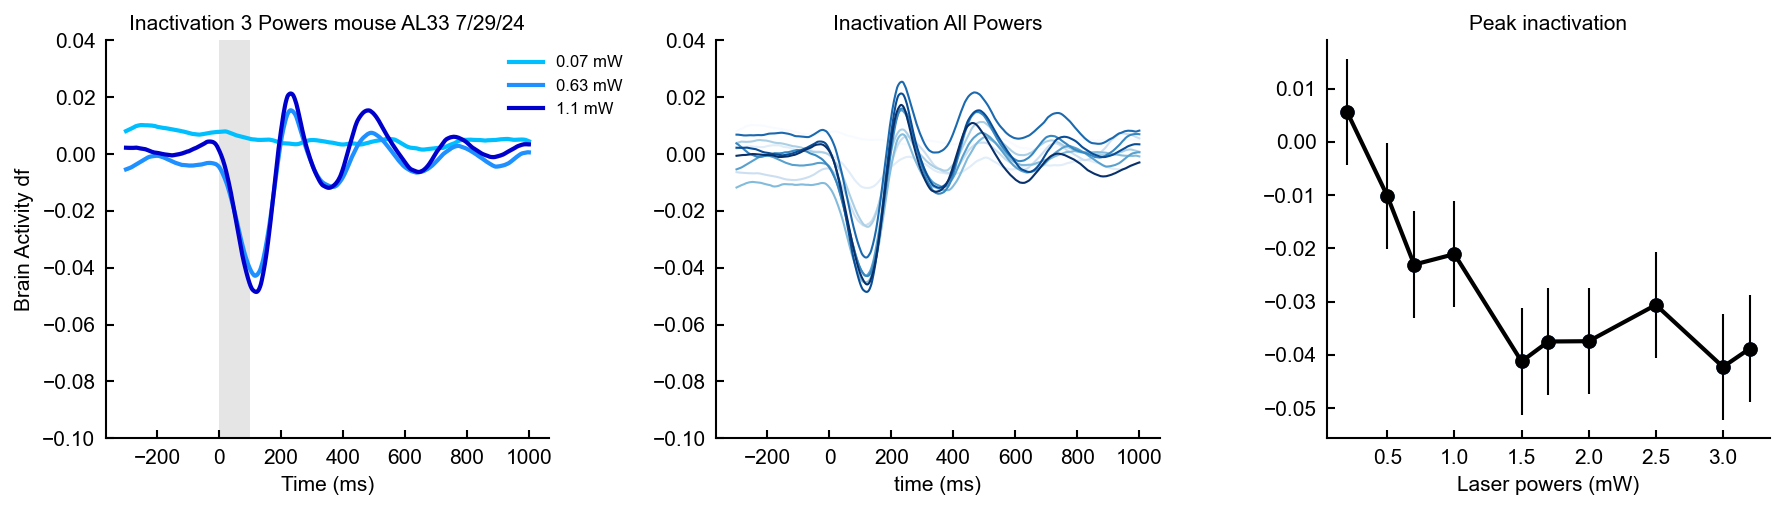

In [51]:
dataset=dataOp729_AB32
mouseset='AL33'
day="7/29/24"
info='PI'
gX=0
gY=4 

f = plt.figure(figsize=(12, 3.5))
gs = mpl.gridspec.GridSpec(1, 3)

ax = plt.subplot(gs[0])
powerDep3Pow(ax,data=dataset,date=day,mouse=mouseset,y=350,x=200,galvoX=gX,galvoY=gY,n_samples=500,pows=[0.2,1.7,3])

ax = plt.subplot(gs[1])
powerDepAllPow(ax,data=dataset,mouse=mouseset,date=day,y=350,x=200,galvoX=gX,galvoY=gY,n_samples=500)

ax = plt.subplot(gs[2])
powerQuant(ax,data=dataset,galvoX=gX,galvoY=gY,y=350,x=200,n_samples=500)

# f.tight_layout()

In [161]:
np.unique(dataSt729_AL34.pulseLengths)

array([0.02, 0.05, 0.1 , 0.25, 0.5 , 1.  , 2.  ])

In [162]:
data=dataSt729_AL34
mouse='AL34'
date='7/29'
y=350
x=120
n_samples=650
width=15
lens = np.unique(data.pulseLengths)
powers = [1.5,1.7]
colors=plt.cm.Blues(np.linspace(0,1,lens.size))
pxLen = []
timestamps = np.linspace(-0.3, 4, n_samples)

pxPowers = np.zeros((2,7,n_samples),dtype=float)
pixel_ix = np.ravel_multi_index((y, x), (data.py, data.px))
for iP,power in enumerate(powers):
    pws=np.argwhere(data.laserPowers==power).ravel()
    for iL, len in enumerate(lens):
        lenTrs = np.argwhere(data.pulseLengths == len).ravel()
        theseTrs=np.intersect1d(lenTrs,pws)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(-.3+on, 4+on, n_samples) for on in onTimes]
        trs = np.squeeze(np.array(trs))
        
        wf = np.mean(data.tToWFManual(trs),axis=0)
        mov = data.svdSpat @ wf.T #add back in spatial -- this now gives us F(t)
        mov = mov.reshape(560,560,-1)
        meanimg = data.meanImage.reshape(560,560,-1)
        avg = meanimg[(y-width):(y+width),(x-width):(x+width)]
        videoROI = mov[(y-width):(y+width),(x-width):(x+width)] # ROI vid with average activity
        mov_mean_dff = videoROI/avg
        avgOverRoi=np.mean(mov_mean_dff,axis=(0,1))
        pxPowers[iP,iL,:] = avgOverRoi

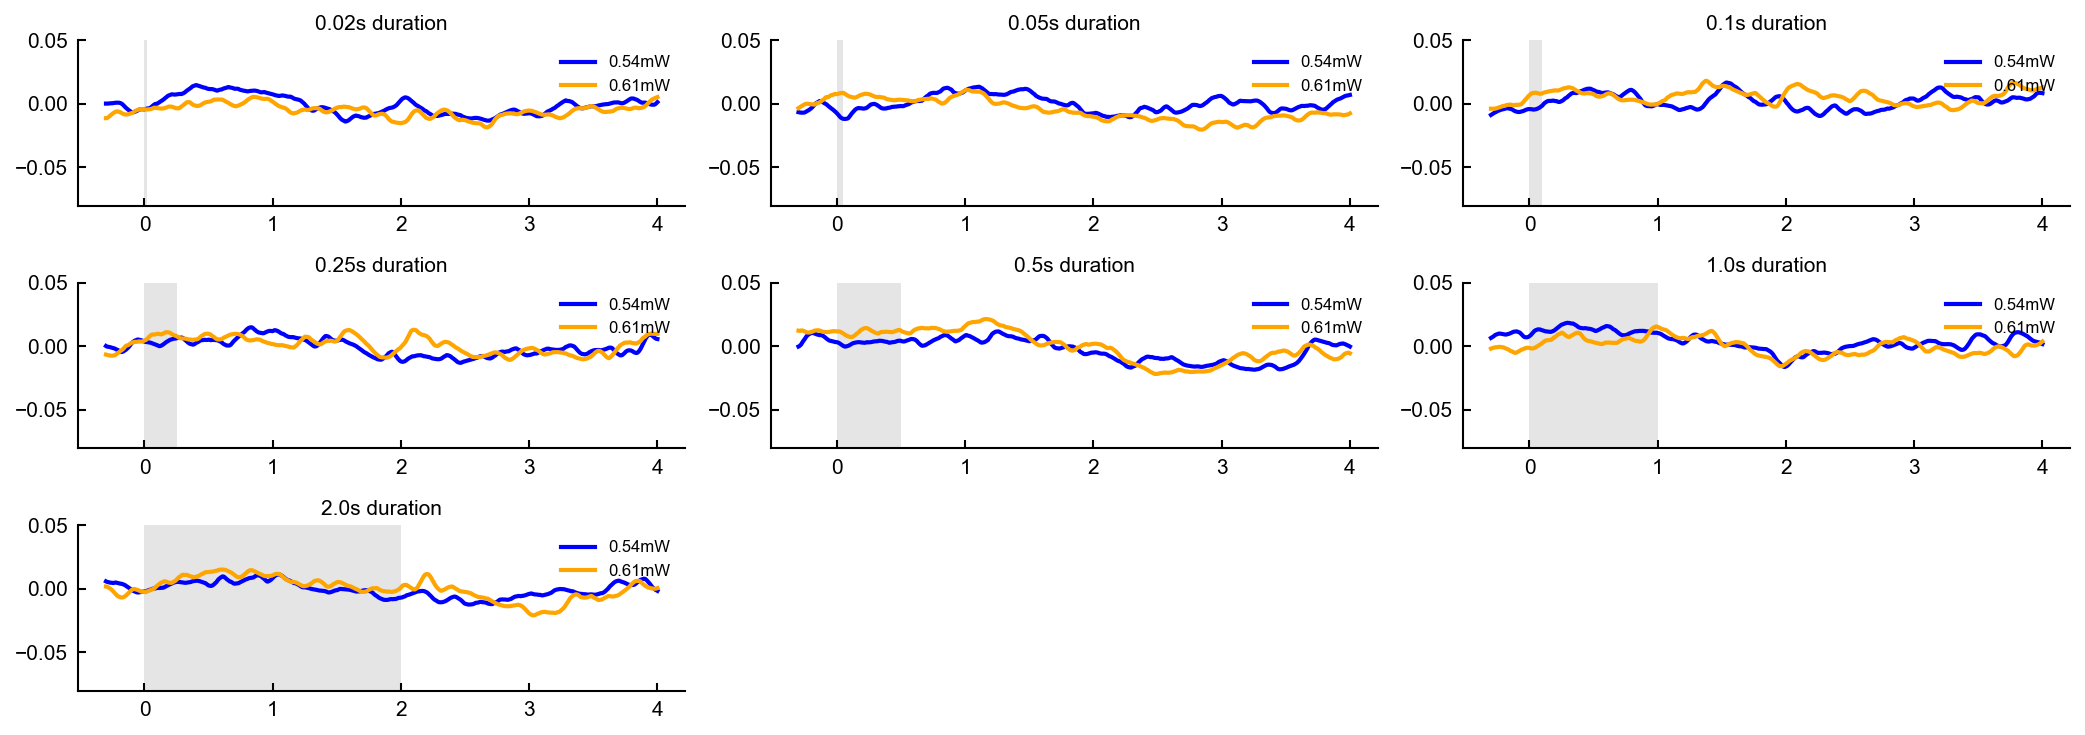

In [163]:
f = plt.figure(figsize=(14, 5))
gs = mpl.gridspec.GridSpec(3,3)
for iL,len in enumerate(lens):
    ax = plt.subplot(gs[iL])
    ax.plot(timestamps,pxPowers[0,iL],color='blue',lw=2,label='0.54mW')
    ax.plot(timestamps,pxPowers[1,iL],color='orange',lw=2,label='0.61mW')
    ax.axvspan(0,len,color='gray',alpha=.2,lw=0,label='_nolegend_')
    plt.legend(loc='upper right')
    plt.title(f'{len}s duration')
    plt.ylim([-0.08,0.05])
f.tight_layout()

In [ ]:
data=dataSt725_AL33
mouse='AB32'
date='7/26'
power=1.7
y=
x=
n_samples=
width=
lens = np.unique(data.pulseLengths)
colors=plt.cm.Blues(np.linspace(0,1,lens.size))
pxLen = []
timestamps = np.linspace(-0.3, 4, n_samples)
pws=np.argwhere(data)

time = []
pixel_ix = np.ravel_multi_index((y, x), (data.py, data.px))
for iP, len in enumerate(lens):
    lenTrs = np.argwhere(data.pulseLengths == len).ravel()
    theseTrs=np.intersect1d(lenTrs,pws)
    onTimes = data.laserOn[theseTrs]
    trs = [np.linspace(-.3+on, 4+on, n_samples) for on in onTimes]
    trs = np.squeeze(np.array(trs))
    
    wf = np.mean(data.tToWFManual(trs),axis=0)
    mov = data.svdSpat @ wf.T #add back in spatial -- this now gives us F(t)
    mov = mov.reshape(560,560,-1)
    meanimg = data.meanImage.reshape(560,560,-1)
    avg = meanimg[(y-width):(y+width),(x-width):(x+width)]
    videoROI = mov[(y-width):(y+width),(x-width):(x+width)] # ROI vid with average activity
    mov_mean_dff = videoROI/avg
    peak = np.min(mov_mean_dff)
    halfpeak=peak/2
    tf = [i<halfpeak for i in mov_mean_dff]
    deac = mov_mean_dff[tf]
    time.append(deac.shape[0]*(1/1000))

In [ ]:
plt.plot(lens,time,'-o',c='k',lw=2)
plt.errorbar(lens,time,yerr=.01,c='k')
plt.scatter(lens,time)
plt.xlabel("Length of stimulus")
plt.ylabel("Time inactivated (s)")
plt.title('Time brain remains inactivated')

## Contralat. Responses

### import

### panels and pick a day

In [ ]:
day=
mouse=
date=

In [ ]:
#presents
power_pick = 2
n_samples=650
timestamps=np.linspace(-.3,1,n_samples)*1000
power = np.argwhere(dataOp622_AL.laserPowers==power_pick).ravel() 
galvoX=np.argwhere(dataOp622_AL.galvoX==2).ravel() #change for loc stim
galvoY=np.argwhere(dataOp622_AL.galvoY==3).ravel() #change for loc stim


#all the pixels we might need
pixel_RightPost=np.ravel_multi_index((390,400),(dataOp622_AL.py, dataOp622_AL.px))
pixel_LeftPost = np.ravel_multi_index((400,200),(dataOp622_AL.py,dataOp622_AL.px))
pixel_LeftAnt=np.ravel_multi_index((120,190),(dataOp622_AL.py, dataOp622_AL.px))
pixel_RightAnt=np.ravel_multi_index((120,310),(dataOp622_AL.py, dataOp622_AL.px))

#find trials
px = np.intersect1d(galvoY,galvoX)
theseTrs=np.intersect1d(px,power)
onTimes=dataOp622_AL.laserOn[theseTrs]
trs=[np.linspace(-.3+on,1+on,n_samples) for on in onTimes]
trs=np.squeeze(np.array(trs))

thisPowerLP=[]
thisPowerRP=[]
thisPowerLA=[]
thisPowerRA=[]
#finding movies for those trials in those locations
for iT, tr in enumerate(trs):
    wf=dataOp622_AL.tToWf(tr)
    dwf=[np.diff(i,prepend=i[0]) for i in wf.T]
    dwf=np.array(dwf)

    #find traces for each pixel

    #posterior
    movRightP=dataOp622_AL.svdSpat[pixel_RightPost]@dwf
    thisPowerRP.append(movRightP)
    movLeftP=dataOp622_AL.svdSpat[pixel_LeftPost]@dwf
    thisPowerLP.append(movLeftP)

    #anterior
    movRightA=dataOp622_AL.svdSpat[pixel_RightAnt]@dwf
    thisPowerRA.append(movRightA)
    movLeftA=dataOp622_AL.svdSpat[pixel_LeftAnt]@dwf
    thisPowerLA.append(movLeftA)

thisPowerLP=np.array(thisPowerLP)
thisPowerRP=np.array(thisPowerRP)
thisPowerLA=np.array(thisPowerLA)
thisPowerRA=np.array(thisPowerRA)

In [ ]:
#plotting those trials and locations

f = plt.figure(figsize=(5/1.5, 3/1.5), dpi=300)
ax = plt.gca()

plt.plot(timestamps,np.mean(thisPowerLP,axis=0),color='darkviolet',label='Left Post')
plt.plot(timestamps,np.mean(thisPowerRP,axis=0),color='violet',label='Right Post')
plt.plot(timestamps,np.mean(thisPowerLA,axis=0),color='blue',label='Left Ant')
plt.plot(timestamps,np.mean(thisPowerRA,axis=0),color='deepskyblue',label='Right Ant')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.title(f'Stimulating Posterior Right {power_pick/2.7778:.2f}mW')
plt.xlabel('time (ms)')
plt.ylabel('$\Delta F$')
plt.axvspan(0,100,color='gray',alpha=.3,lw=0,label='_nolegend_')
plt.ylim([-15,15])

### make a gif

In [ ]:
def makeVideo(data,galvoX=0,galvoY=3.3,power=1,n_samples=300):
    power = np.argwhere(data.laserPowers==power).ravel() 
    galvoXTrs=np.argwhere(data.galvoX==galvoX).ravel() #change for loc stim
    galvoYTrs=np.argwhere(data.galvoY==galvoY).ravel() #change for loc stim

    #find trials
    px = np.intersect1d(galvoYTrs,galvoXTrs)
    theseTrs=np.intersect1d(px,power)
    allVideos=[]

    onTimes = data.laserOn[theseTrs]
    trs = [np.linspace(-0.1+on, 1+on, n_samples) for on in onTimes]
    trs = np.squeeze(np.array(trs))

    wf = np.mean(data.tToWf(trs), axis=0)

    dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
    dwf = np.array(dwf)
    mov = data.svdSpat @ dwf
    allVideos = mov.reshape(data.px, data.py, -1)
    allVideos=np.array(allVideos)
    return allVideos


In [ ]:
dataOp425.galvoX

In [ ]:
#checking pixel loc
allVideosOneFrame=np.mean(allVideosMean,axis=2)
#show where the pixels im chosing are 

plt.imshow(allVideosOneFrame,cmap='bwr')
#add all those pixels im tracking
plt.scatter(420,400,color='violet')
plt.scatter(120,420,color='darkviolet')
plt.scatter(200,120,color='blue')
plt.scatter(320,120,color='skyblue')

In [ ]:
n_samples=300
vid425=makeVideo(data=dataOp425)

In [ ]:
n_samples=300
vid622=makeVideo(data=dataOp622_AL,galvoX=0,galvoY=3,power=3)

In [ ]:
#find when the stim is on
f=plt.figure(figsize=(4, 4))

#make sure n_samples and timestamps are consistent between this code and the img making code - especially when youre making the trials for the images
n_samples=300
timestamps=np.linspace(-.1,1,n_samples)*1000
stimOn = np.intersect1d(np.argwhere(timestamps > 0).ravel(), np.argwhere(timestamps < 100).ravel())
ax=plt.subplot()
clim=np.percentile(vid622,(2,99.9)) 
img = plt.imshow(vid622[:,:,0],cmap='bwr',clim=np.r_[-1, 1]*50)
plt.colorbar()
plt.scatter(400,400,color='violet') #right post
plt.scatter(120,420,color='darkviolet') #left post
plt.scatter(220,120,color='blue') #left ant
plt.scatter(320,120,color='skyblue') #right ant
stext = plt.text(0.1, 0.999, '', fontsize='large', transform=ax.transAxes, zorder=20)

#set up the frames to loop through for the animation
def animate(i):
    img.set_array(vid622[:,:,i])
    f.suptitle(f't = {timestamps[i]:.0f} ms',size=15)
    if np.isin(i, stimOn):
        stext.set_text('STIM ON')
        stext.set_color('red')
    else:
        stext.set_text('STIM OFF')
        stext.set_color('k')

anim = mpl.animation.FuncAnimation(f, animate, frames=n_samples-1, cache_frame_data=False, interval=1)

In [ ]:
savepath = 'C:/Users/nadia/Downloads/gif/425_LA.gif'

writergif=mpl.animation.PillowWriter(fps=60)
anim.save(savepath,writer=writergif)

## Visresp figs

### import

In [ ]:
dataVis809=wfOpto(Path(r'Y:\Subjects\AL_0023\2023-08-09\1')) # 2 locations. (1,0) and (4,0)

In [ ]:
dataVis814=wfOpto(Path(r'Y:\Subjects\AL_0023\2023-08-14\1')) # 2 locations. (1,0) and (4,0), more powers

In [ ]:
dataVis815=wfOpto(Path(r'Y:\Subjects\AL_0023\2023-08-15\1')) # 2 locations. (1,0) and (4,0), diff higher powers

In [ ]:
dataVis823=wfOpto(Path(r'Y:\Subjects\AL_0023\2023-08-23\3')) #3 locations across hemi

In [ ]:
dataVis824=wfOpto(Path(r'Y:\Subjects\AL_0023\2023-08-24\1')) #3 locations across hemi

In [ ]:
dataVis825=wfOpto(Path(r'Y:\Subjects\AL_0023\2023-08-25\2')) #3 locations across hemi

In [4]:
dataVis722 = wfOpto(Path(r'Y:\Subjects\ZYE_0077\2024-07-22\1'))

In [ ]:
brain(dataVis809,galvoX=1,galvoY=0,power=0.7,frame=120,n_samples=650,start=.3,end=1,X=100,Y=390)

In [ ]:
brain(dataVis814,galvoX=1,galvoY=0,power=3,frame=100,n_samples=300,start=.3,end=1,X=100,Y=380)

In [ ]:
brain(dataVis815,galvoX=1,galvoY=0,power=5,frame=50,n_samples=300,start=-.3,end=1,X=100,Y=380)

In [5]:
dataVis722 = wfOpto(Path(r'Y:\Subjects\ZYE_0077\2024-07-22\1'))

In [ ]:
dataVis722_noflicker = wfOpto((Path(r'Y:\Subjects\ZYE_0077\2024-07-22\2')))

In [ ]:
dataVis722_flicker = wfOpto((Path(r'Y:\Subjects\ZYE_0077\2024-07-22\3')))

### funcs and pick a day

In [ ]:
data=dataVis722
mouse="ZYE_0077"
day="7/22/2024"
info=" no flicker, on water restriction w/ reward"

In [ ]:
brainFrame(data=data,galvoX=0,galvoY=0,power=2.5,frame=130)

In [ ]:
def visRespAll(ax,data,mouse,day,info="",galvoX=0,galvoY=0,x=120,y=380,n_samples=650):
    powers = np.unique(data.laserPowers)
    pxPowers = []
    timestamps = np.linspace(-0.3, 1, n_samples)*1000
    colors=plt.cm.PuRd(np.linspace(.3,1,len(powers)))

    X=600
    #this depends on mouse (and maybe day) !!!!!
    galvoXTrs=np.argwhere(data.galvoX[:X]==galvoX).ravel()
    galvoYTrs=np.argwhere(data.galvoY[:X]==galvoY).ravel()
    loc=np.intersect1d(galvoXTrs,galvoYTrs)

    pixel_ix = np.ravel_multi_index((y, x), (data.py, data.px))
    for iP, power in enumerate(powers):
        pwTrs = np.argwhere(data.laserPowers[:X] == power).ravel()
        theseTrs=np.intersect1d(pwTrs,loc)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
        trs = np.squeeze(np.array(trs))
        
        thisPower = []
        for iT, tr in enumerate(trs):
            wf = data.tToWFManual(tr)
            dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
            dwf = np.array(dwf)
            mov = data.svdSpat[pixel_ix] @ dwf
            thisPower.append(mov)
        thisPower = np.array(thisPower)
        pxPowers.append(thisPower)
        
    powers_corrected=[round(i/2.777777778,2) for i in powers]
    for i,iP in enumerate(pxPowers):
        plt.plot(timestamps, np.mean(iP, axis=(0)),color=colors[i],label=powers_corrected[i])

In [ ]:
def visResp3Pow(ax,data,mouse,day,info="",galvoX=0,galvoY=0,x=120,y=380,n_samples=650,pow=[0.5,1.5,2.5]):
    powers = pow
    pxPowers = []
    timestamps = np.linspace(-0.3, 1, n_samples)*1000
    colors=plt.cm.PuRd(np.linspace(.3,1,len(powers)))

    X=600
    #this depends on mouse (and maybe day) !!!!!
    galvoXTrs=np.argwhere(data.galvoX[:X]==galvoX).ravel()
    galvoYTrs=np.argwhere(data.galvoY[:X]==galvoY).ravel()
    loc=np.intersect1d(galvoXTrs,galvoYTrs)

    pixel_ix = np.ravel_multi_index((y, x), (data.py, data.px))
    for iP, power in enumerate(powers):
        pwTrs = np.argwhere(data.laserPowers[:X] == power).ravel()
        theseTrs=np.intersect1d(pwTrs,loc)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
        trs = np.squeeze(np.array(trs))
        
        thisPower = []
        for iT, tr in enumerate(trs):
            wf = data.tToWFManual(tr)
            dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
            dwf = np.array(dwf)
            mov = data.svdSpat[pixel_ix] @ dwf
            thisPower.append(mov)
        thisPower = np.array(thisPower)
        pxPowers.append(thisPower)

    powers_corrected=[round(i/2.777777778,2) for i in powers]
    for i,iP in enumerate(pxPowers):
        plt.plot(timestamps, np.mean(iP, axis=0),color=colors[i])
    
    plt.legend(powers_corrected)
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(200))
    plt.xlabel('time (ms)')
    plt.title(f'Visual Activation n={len(trs)}trials')
    # plt.text(x=1,y=1,s=info)
    plt.axvspan(0,100,color='gray',alpha=.2,lw=0,label='_nolegend_')

In [ ]:
def visRespQuant(ax,data,mouse,day,info="",galvoX=0,galvoY=0,x=100,y=390,n_samples=650,time=60):
    powers = np.unique(data.laserPowers)
    pxPowers = []
    timestamps = np.linspace(-0.3, 1, n_samples)*1000

    X=600
    galvoXTrs=np.argwhere(data.galvoX[:X]==galvoX).ravel()
    galvoYTrs=np.argwhere(data.galvoY[:X]==galvoY).ravel()
    loc=np.intersect1d(galvoXTrs,galvoYTrs)

    pixel_ix = np.ravel_multi_index((y, x), (data.py, data.px))
    for iP, power in enumerate(powers):
        pwTrs = np.argwhere(data.laserPowers[:X] == power).ravel()
        theseTrs=np.intersect1d(pwTrs,loc)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
        trs = np.squeeze(np.array(trs))
        
        thisPower = []
        for iT, tr in enumerate(trs):
            wf = data.tToWFManual(tr)
            dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
            dwf = np.array(dwf)
            mov = data.svdSpat[pixel_ix] @ dwf
            thisPower.append(mov)
        thisPower = np.array(thisPower[:40])
        pxPowers.append(thisPower)

    pixelInterp = scipy.interpolate.interp1d(timestamps, pxPowers, axis=2, fill_value='extrapolate')

    time90 = pixelInterp(time)

    timeMean = np.mean(time90, axis=1)
    plt.plot(powers,timeMean,'-o',c='k',lw=2)
    plt.errorbar(powers,timeMean,yerr=.8,c='k')
    plt.scatter(powers,timeMean)
    plt.xlabel("Laser powers (mW)")
    plt.title(f'Peak activation ({time} ms)')
    # plt.text(x=1,y=-1.5,s=info)

In [ ]:
f = plt.figure(figsize=(14,3))
gs=mpl.gridspec.GridSpec(1,3)

time=70
ax = plt.subplot(gs[0])
visResp3Pow(ax,data=data,galvoX=0,galvoY=0,mouse=mouse,day=day,info=info,pow=[1.5,2,2.5],x=250,y=400)
plt.axvline(x=time)

ax = plt.subplot(gs[1])
visRespAll(ax,data=data,galvoX=0,galvoY=0,mouse=mouse,day=day,info=info,x=250,y=400)
plt.axvline(x=time)

ax = plt.subplot(gs[2])
visRespQuant(ax,data=data,galvoX=0,galvoY=0,time=time,mouse=mouse,day=day,info=info,x=250,y=400)


### testing

look at RF mapping

theres 1200 experiment trials, so all trials after should be RF trials. how many RF trials are there? can figure by getting exp start and the indexes associated in matlab
but the thing is there arent trials. its just one long trial right?
i just need all the brain activity from this one section of the recording
i think i might need cameraTrigger

In [8]:
dataVis722.frameTimes.shape

(112412,)

False

In [ ]:
vid = makeVideo(dataVis722,galvoX=0,galvoY=0,power=2.5)

In [ ]:
plt.imshow(vid[:,:,24],cmap='bwr',clim=np.percentile(vid[:,:,24],(2,99.9)))
plt.scatter(x=250,y=400)

In [ ]:
n_cols=5;n_rows=10
f = plt.figure(figsize=(n_cols*2, n_rows*2))
gs = mpl.gridspec.GridSpec(n_rows, n_cols)
for i in range(50):
    ax = plt.subplot(gs[i])
    brain=plt.imshow(vid[:, :, i*2], clim = np.percentile(vid, (2, 99.9)), cmap='bwr')
    plt.colorbar(brain)

In [ ]:
f = plt.figure(figsize=(7,15))
gs=mpl.gridspec.GridSpec(5,10)

#presets and needs
data=dataVis722_noflicker
power=2.5
# x=120
# y=380
# pixel_ix = np.ravel_multi_index((y, x), (data.py, data.px))
n_samples = 500
start=-.3
stop=1
timestamps = np.linspace(start, stop, n_samples)

#finding trs
pwTrs=np.argwhere(data.laserPowers==power).ravel()
galvoX=np.argwhere(data.galvoX==0).ravel()
galvoY=np.argwhere(data.galvoY==0).ravel()
loc=np.intersect1d(galvoX,galvoY)
theseTrs=np.intersect1d(loc,pwTrs)
onTimes = data.laserOn[theseTrs]
trs = [np.linspace(start+on, stop+on, n_samples) for on in onTimes]
trs = np.squeeze(np.array(trs))

for iT, tr in enumerate(trs):
    wf = data.tToWf(tr)
    dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
    mov = data.svdSpat @ dwf
    mov = mov.reshape(560,560,-1)
    videoROI = mov[300:400, 100:200]
    videoROI = np.array(videoROI)

    #set up axis
    ax=plt.subplot(gs[iT])
    ax.plot(timestamps, np.mean(videoROI,axis=(0,1)), linewidth=2,color='k')
    ax.axvspan(0,0.1,color='gray',alpha=.2,lw=0,label='_nolegend_')
    ax.set_title(f'Trial {iT}')
    ax.set_xlabel('time (s)')
    ax.set_ylabel('activity df/f')
    # ax.set_ylim([-200,200])
    f.tight_layout()

In [ ]:
thisPower.shape

In [ ]:
dataFlicker=wfOpto(Path(r'Y:\Subjects\AL_0032\2024-04-28\1'))

In [ ]:
serverPath = Path(r'Y:\Subjects\AL_0032\2024-04-27\1')
timeFile = serverPath / 'cameraFrameTimes.npy'
frameTimes = np.squeeze(np.load(timeFile))[::2] # every other frame - we want blue only
svdTemp = np.load(serverPath / 'corr/svdTemporalComponents_corr.npy')
svdSpat = np.load(serverPath / 'blue/svdSpatialComponents.npy')
svdSpatFull = svdSpat[:,:,:500]

meanImage = np.load(serverPath / 'blue/meanImage.npy')
laserOn = np.squeeze(np.load(serverPath / 'laserOnTimes.npy'))
laserOff = np.squeeze(np.load(serverPath / 'laserOffTimes.npy'))
laserPowers = np.squeeze(np.load(serverPath /'laserPowers.npy'))
galvoX = np.squeeze(np.load(serverPath/'galvoXPositions.npy'))
galvoY = np.squeeze(np.load(serverPath/'galvoYPositions.npy'))
px, py, ncomps = svdSpatFull.shape

svdSpat = svdSpatFull.reshape(px*py, ncomps)

In [ ]:
tToWf = scipy.interpolate.interp1d(frameTimes[:70943], svdTemp, axis=0, fill_value='extrapolate')
spatial = svdSpatFull.reshape(560*560,-1)

In [ ]:
plt.imshow(meanImage)

In [ ]:
print(np.unique(laserPowers))
print(np.unique(galvoX))
print(np.unique(galvoY))

In [ ]:
power = 3
pixel = (200, 350)
n_samples = 650
timestamps = np.linspace(-0.3, 10, n_samples)
locs=np.argwhere(galvoY==0).ravel()

pixel_ix = np.ravel_multi_index((350, 200), (py, px))
pows = np.argwhere(laserPowers == power).ravel()
times=np.intersect1d(pows,locs)
onTimes = laserOn[times]
trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
trs = np.squeeze(np.array(trs))

noFlicker = []
for iT, tr in enumerate(trs):
    wf = tToWf(tr)
    dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
    dwf = np.array(dwf)
    mov = svdSpat[pixel_ix] @ dwf
    noFlicker.append(mov)
noFlicker = np.array(noFlicker)

plt.plot(timestamps, np.mean(noFlicker, axis=0), color='green',label='no flicker')

In [ ]:
# process flicker
power = 3
pixel = (200, 400)
n_samples = 650
timestamps = np.linspace(-0.3, 10, n_samples)

pixel_ix = np.ravel_multi_index((400, 200), (dataFlicker.py, dataFlicker.px))
pows = np.argwhere(dataFlicker.laserPowers[dataFlicker.listExps[0]] == power).ravel()
locs=np.argwhere(dataFlicker.galvoY==0).ravel()
times=np.intersect1d(locs,pows)
onTimes = dataFlicker.laserOn[times]
trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
trs = np.squeeze(np.array(trs))

flicker = []
for iT, tr in enumerate(trs):
    wf = dataFlicker.tToWFManual(tr)
    dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
    dwf = np.array(dwf)
    mov = dataFlicker.svdSpat[pixel_ix] @ dwf
    flicker.append(mov)
flicker = np.array(flicker)

# process no flicker
power = 3
pixel = (410, 428)
n_samples = 650
timestamps = np.linspace(-0.3, 1, n_samples)*1000

pixel_ix = np.ravel_multi_index((400, 200), (py, px))
pows = np.argwhere(laserPowers == power).ravel()
locs=np.argwhere(dataFlicker.galvoY==-0).ravel()
times=np.intersect1d(locs,pows)
onTimes = dataFlicker.laserOn[times]
trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
trs = np.squeeze(np.array(trs))

noFlicker = []
for iT, tr in enumerate(trs):
    wf = tToWf(tr)
    dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
    dwf = np.array(dwf)
    mov = svdSpat[pixel_ix] @ dwf
    noFlicker.append(mov)
noFlicker = np.array(noFlicker)

plt.plot(timestamps, np.mean(noFlicker, axis=0), color='green',label='no flicker')
plt.fill_between(timestamps, \
                    np.mean(noFlicker, axis=0)-scipy.stats.sem(noFlicker,axis=0),\
                    np.mean(noFlicker,axis=0)+scipy.stats.sem(noFlicker,axis=0), color='green', alpha=0.3, lw=0, label='_nolegend_')

plt.plot(timestamps, np.mean(flicker,axis=0),color='orange',label='flicker')
plt.fill_between(timestamps, \
                    np.mean(flicker, axis=0)-scipy.stats.sem(flicker,axis=0),\
                    np.mean(flicker,axis=0)+scipy.stats.sem(flicker,axis=0), color='orange', lw=0, label='_nolegend_', alpha=0.3)
plt.axvspan(0,100,color='gray',alpha=.3,lw=0)
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(200))
plt.legend()
plt.xlim([-100,500])
plt.xlabel('Time from stim onset(s)')
plt.ylabel('Activity in visual cortex')
plt.title(f'{power} mW opto stim')

In [ ]:
noFlicker.shape

In [ ]:
pow=3
visPow(ax,ylim,pow,dataFlicker,dataNo)

# visQuant

In [ ]:
mouse='AL_0027'
date="4/18"

In [ ]:
fig.savefig(f'C:\GitHub\steinmetzlab\wf + opto\figs\control\{mouse}_{date}')